In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
import geopandas as gpd
import datetime

In [2]:
df = pd.read_csv("Installed_Power_Capacity_State_wise_MW.csv")
df1 = pd.read_csv("Power_Generation.csv")
df2 = pd.read_csv("gdp.csv")
shp_gdf = gpd.read_file("India_State_Boundary.shp")
df3 = pd.read_excel("scapped_data_1.xlsx")

In [3]:
df.head(2)

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
0,1,Jan-2019,Northern,Chandigarh,0.0,0.0,0.0,0.0,0.0,0.0,32.40,32.40
1,2,Jan-2019,Northern,Delhi,135.0,2208.4,0.0,2343.4,0.0,0.0,176.21,2519.61


In [4]:
df1.head(2)

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53


In [5]:
year_2019 = df.iloc[397:432,:]
year_2020 = df.iloc[840:876,:]
year_2021 = df.iloc[1282:1317,:]

In [6]:
total_grand1 = year_2019["grand_total"].sum()
total_grand2 = year_2020["grand_total"].sum()
total_grand3 = year_2021['grand_total'].sum()

In [7]:
total_thermal = year_2019["thermal_total"].sum()
total_nuclear = year_2019['nuclear'].sum()
total_hydro = year_2019['hydro'].sum()
total_renewable = year_2019['res'].sum()

total_thermal2 = year_2020["thermal_total"].sum()
total_nuclear2 = year_2020['nuclear'].sum()
total_hydro2 = year_2020['hydro'].sum()
total_renewable2 = year_2020['res'].sum()

total_thermal3 = year_2021["thermal_total"].sum()
total_nuclear3 = year_2021['nuclear'].sum()
total_hydro3 = year_2021['hydro'].sum()
total_renewable3 = year_2021['res'].sum()

total_coal = year_2019["coal"].sum()
total_gas = year_2019['gas'].sum()
total_diesel = year_2019['diesel'].sum()

total_coal1 = year_2020["coal"].sum()
total_gas1 = year_2020['gas'].sum()
total_diesel1 = year_2020['diesel'].sum()

total_coal2 = year_2021["coal"].sum()
total_gas2 = year_2021['gas'].sum()
total_diesel2 = year_2021['diesel'].sum()

total_grand1 = year_2019["grand_total"].sum()
total_grand2 = year_2020["grand_total"].sum()
total_grand3 = year_2021['grand_total'].sum()


In [8]:
lst_tmp = {"COAL" : [total_coal,total_coal1,total_coal2]
           ,"NUCLEAR":[total_nuclear,total_nuclear2,total_nuclear3]
          ,"GAS":[total_gas,total_gas1,total_gas2]
          ,'DIESEL':[total_diesel,total_diesel1,total_diesel2]
           ,"HYDRO" :[total_hydro,total_hydro2,total_hydro3]
          ,"RENEWABLE":[total_renewable,total_renewable2,total_renewable3]
          ,"YEAR":[2019,2020,2021]}

In [9]:
df_mod = pd.DataFrame(lst_tmp)
df_melted = pd.melt(df_mod,id_vars='YEAR',var_name='variable',value_name='value')

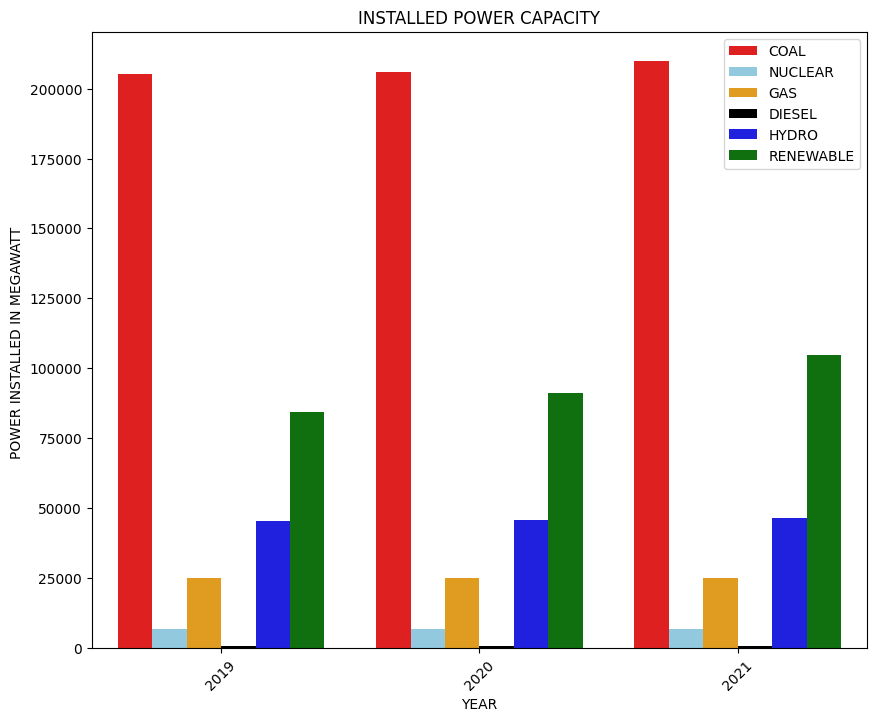

In [10]:
plt.figure(figsize=(10,8))
colors = {"COAL":"red","NUCLEAR": "skyblue", "GAS": "orange", "DIESEL": "black","HYDRO":'blue',"RENEWABLE":'green'}

sns.barplot(x='YEAR', y='value', hue='variable', data=df_melted,palette=colors)
plt.xticks(rotation=45)
plt.title("INSTALLED POWER CAPACITY")
plt.xlabel("YEAR")
plt.ylabel("POWER INSTALLED IN MEGAWATT ")
plt.legend()
plt.show()

In [11]:
def percentage_change(new,old):
    return (((new - old)/old)*100)

In [12]:
c1 = percentage_change(total_coal1,total_coal)
c2 = percentage_change(total_coal2,total_coal1)
n1 = percentage_change(total_nuclear2,total_nuclear)
n2 = percentage_change(total_nuclear3,total_nuclear2)
g1 = percentage_change(total_gas1,total_gas)
g2 = percentage_change(total_gas2,total_gas1)
d1 = percentage_change(total_diesel1,total_diesel)
d2 = percentage_change(total_diesel2,total_diesel1)
r1 = percentage_change(total_renewable2,total_renewable)
r2 = percentage_change(total_renewable3,total_renewable2)
h1 = percentage_change(total_hydro2,total_hydro)
h2 = percentage_change(total_hydro3,total_hydro2)
# print(per)

In [13]:
lst_tmp2 = {"COAL" : [c1,c2]
           ,"NUCLEAR":[n1,n2]
          ,"GAS":[g1,g2]
          ,'DIESEL':[d1,d2]
           ,"HYDRO" :[h1,h2]
          ,"RENEWABLE":[r1,r2]
          ,"YEAR":["2019-2020","2020-2021"]}

In [14]:
df_mod2 = pd.DataFrame(lst_tmp2)

In [15]:
df_melted2 = pd.melt(df_mod2,id_vars='YEAR',var_name='variable',value_name='value')

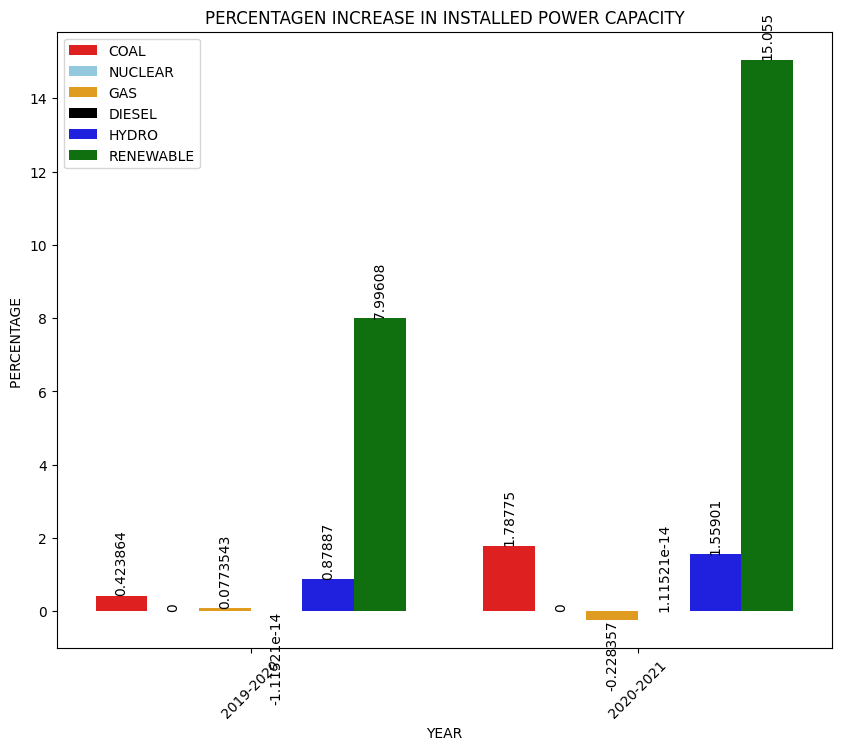

In [16]:
plt.figure(figsize=(10,8))

# define custom colors for each variable
colors = {"COAL":"red","NUCLEAR": "skyblue", "GAS": "orange", "DIESEL": "black","HYDRO":'blue',"RENEWABLE":'green'}

ax = sns.barplot(x='YEAR', y='value', hue='variable', data=df_melted2, palette=colors)

# to add the values at the top of the bar
for p in ax.containers:
    ax.bar_label(p, label_type="edge",fontsize = 10,rotation=90)
plt.xticks(rotation=45)
plt.title("PERCENTAGEN INCREASE IN INSTALLED POWER CAPACITY")
plt.xlabel("YEAR")
plt.ylabel("PERCENTAGE ")
plt.legend()
plt.show()


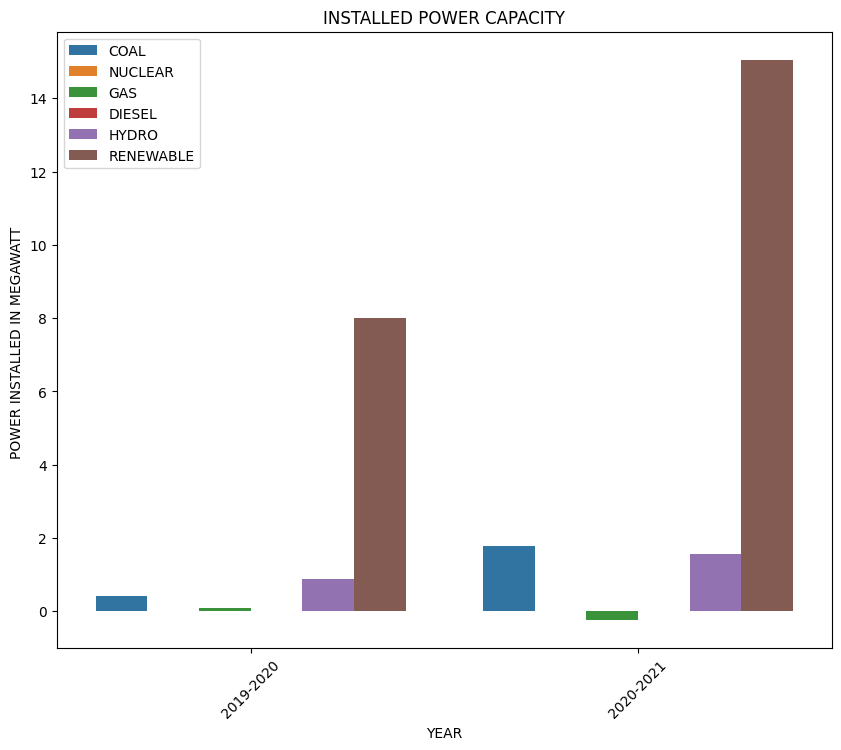

In [17]:
c = ["red","yellow",'voilet','black',"blue","green"]
plt.figure(figsize=(10,8))
sns.barplot(x='YEAR', y='value', hue='variable', data=df_melted2)
plt.xticks(rotation=45)
plt.title("INSTALLED POWER CAPACITY")
plt.xlabel("YEAR")
plt.ylabel("POWER INSTALLED IN MEGAWATT ")
plt.legend()
plt.show()

In [18]:
x = [total_thermal,total_hydro,total_renewable,total_nuclear]
y = ['THERMAL',"HYDRO","RENEWABLE","NUCLEAR"]
ex = [0.1,0.05,0.05,0.05]
c = ["r","b","g","y"]
x2 = [total_thermal2,total_hydro2,total_renewable2,total_nuclear2]
x3 = [total_thermal3,total_hydro3,total_renewable3,total_nuclear3]

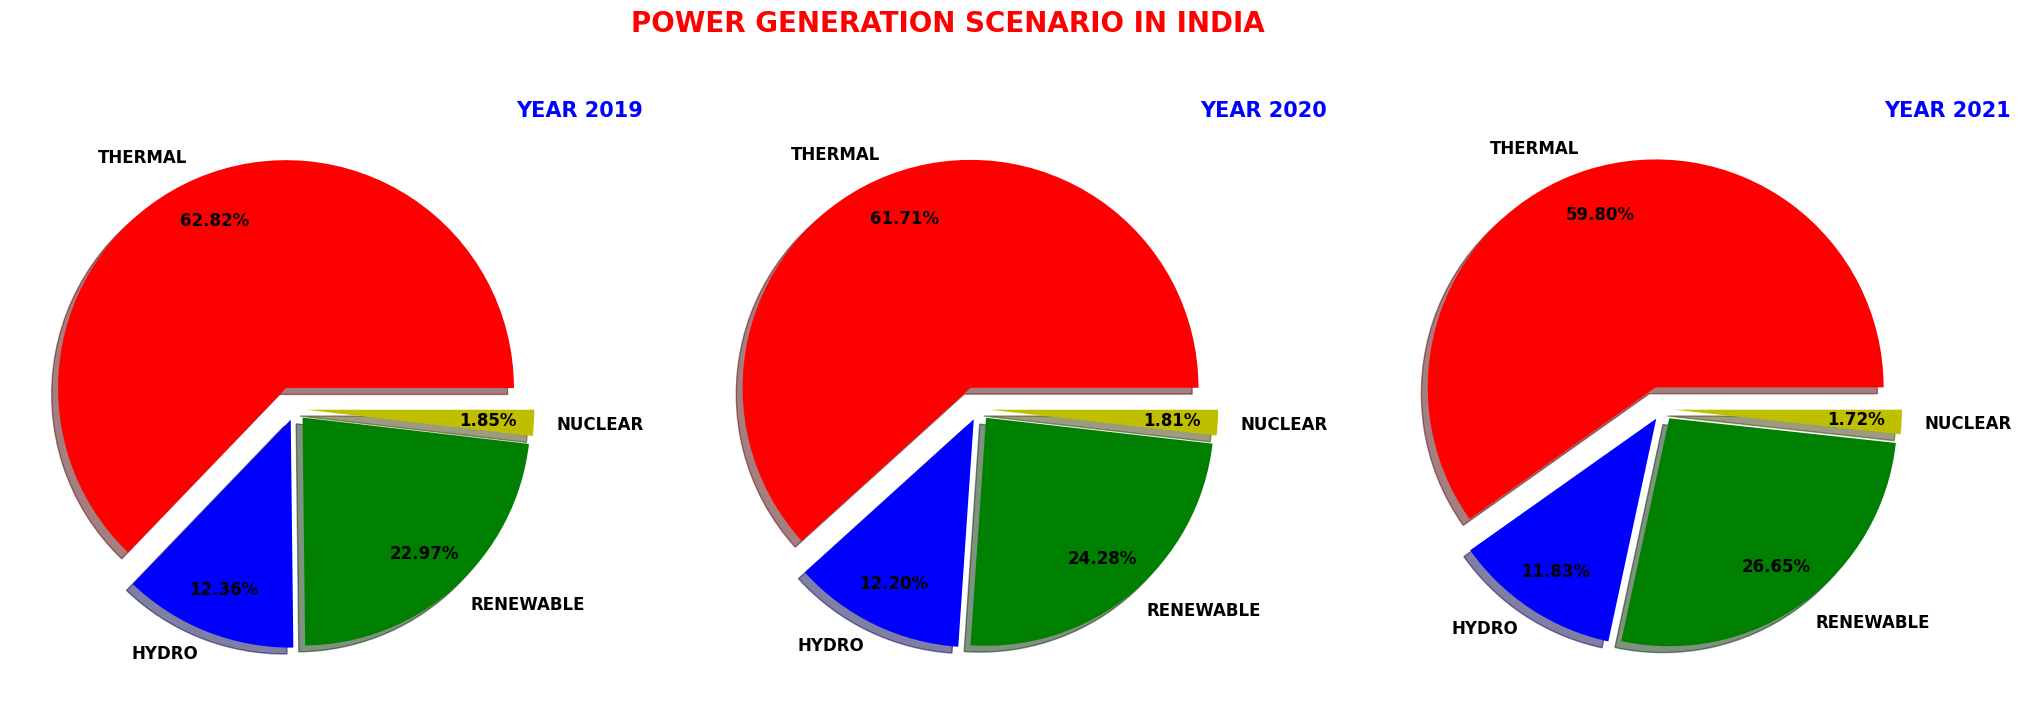

In [19]:

plt.figure(figsize=(25,20))
plt.subplot(1,3,1)
plt.pie(x,labels=y,explode=ex,autopct="%0.2f%%",shadow=True,radius=1,labeldistance=1.1
        ,startangle=0,textprops={"fontsize":12,"fontweight":'bold'},pctdistance=0.8,colors=c)
plt.title("YEAR 2019",x=1,y=1,color='blue',fontsize=15,fontweight='bold')
# plt.show()
plt.subplot(1,3,2)
plt.pie(x2,labels=y,explode=ex,autopct="%0.2f%%",shadow=True,radius=1,labeldistance=1.1
        ,startangle=0,textprops={"fontsize":12,"fontweight":'bold'},pctdistance=0.8,colors=c)
plt.title("YEAR 2020",x=1,y=1,color='blue',fontsize=15,fontweight='bold')
plt.subplot(1,3,3)
plt.pie(x3,labels=y,explode=ex,autopct="%0.2f%%",shadow=True,radius=1,labeldistance=1.1
        ,startangle=0,textprops={"fontsize":12,"fontweight":'bold'},pctdistance=0.8,colors=c)
plt.title("YEAR 2021",x=1,y=1,color='blue',fontsize=15,fontweight='bold')
plt.suptitle("POWER GENERATION SCENARIO IN INDIA",fontsize=20,color='red',fontweight='bold')
plt.subplots_adjust(top=1.45)
plt.show()

In [20]:
total_coal = year_2019["coal"].sum()
total_gas = year_2019['gas'].sum()
total_diesel = year_2019['diesel'].sum()

total_coal1 = year_2020["coal"].sum()
total_gas1 = year_2020['gas'].sum()
total_diesel1 = year_2020['diesel'].sum()

total_coal2 = year_2021["coal"].sum()
total_gas2 = year_2021['gas'].sum()
total_diesel2 = year_2021['diesel'].sum()


In [21]:
x_1 = [total_coal,total_gas,total_diesel]
x_2 = [total_coal1,total_gas1,total_diesel1]
x_3 = [total_coal2,total_gas2,total_diesel2]
y_1 = ["COAL","GAS","DIESEL"]
ex_1 = [0.1,0.05,0.15]
c_1 = ["r","b","g"]

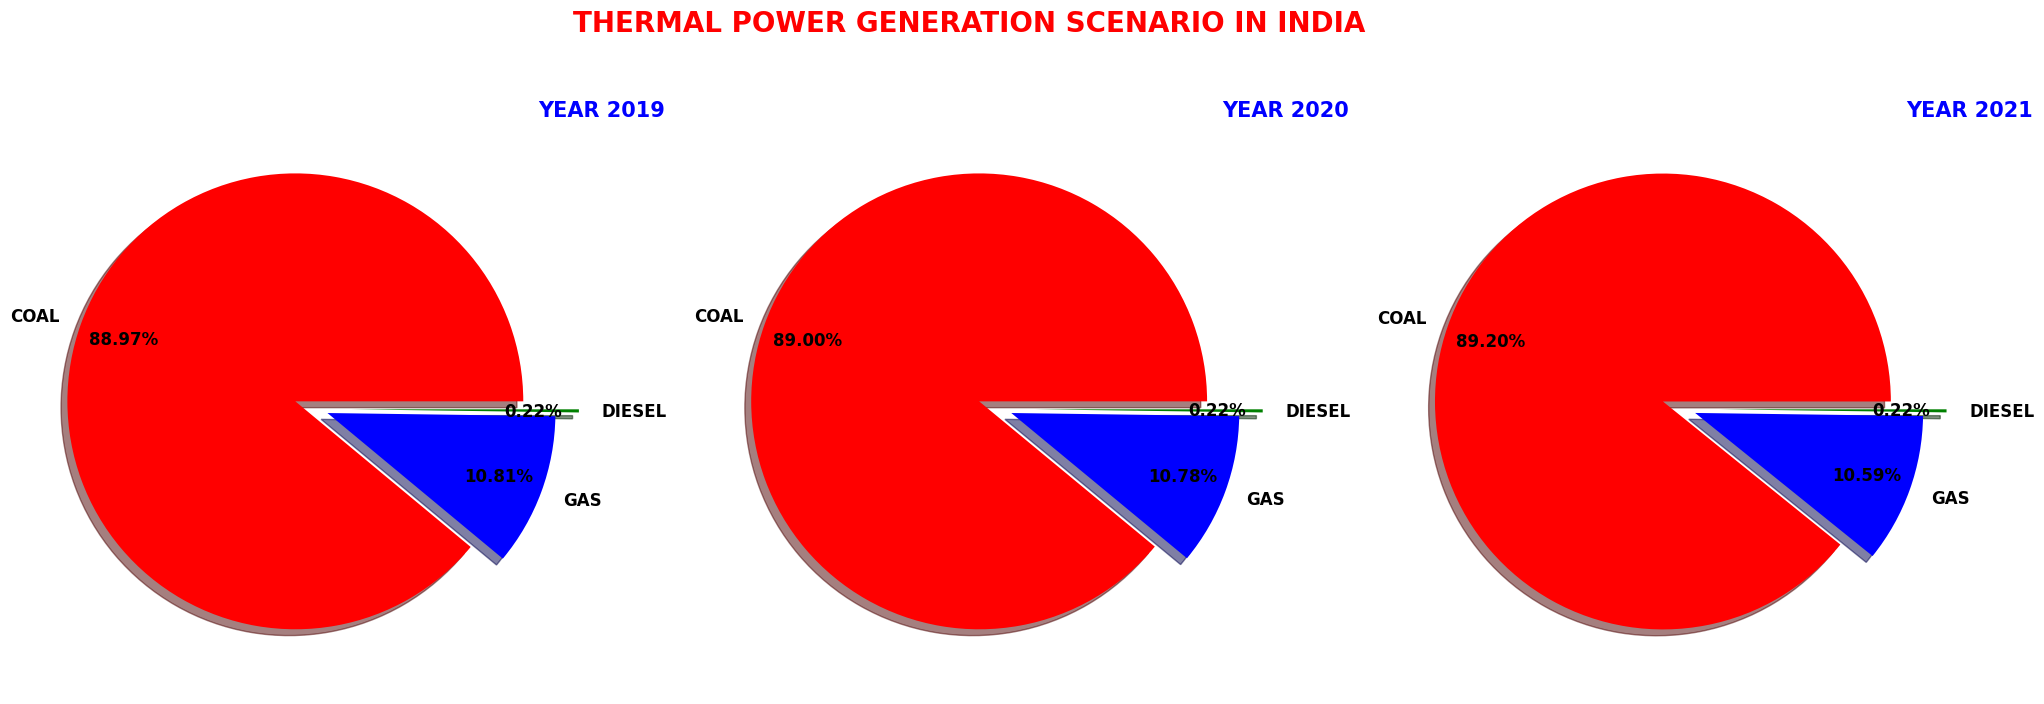

In [22]:
plt.figure(figsize=(25,20))
plt.subplot(1,3,1)
plt.pie(x_1,labels=y_1,explode=ex_1,autopct="%0.2f%%",shadow=True,radius=1,labeldistance=1.1
        ,startangle=0,textprops={"fontsize":12,"fontweight":'bold'},pctdistance=0.8,colors=c)
plt.title("YEAR 2019",x=1,y=1,color='blue',fontsize=15,fontweight='bold')
# plt.show()
plt.subplot(1,3,2)
plt.pie(x_2,labels=y_1,explode=ex_1,autopct="%0.2f%%",shadow=True,radius=1,labeldistance=1.1
        ,startangle=0,textprops={"fontsize":12,"fontweight":'bold'},pctdistance=0.8,colors=c)
plt.title("YEAR 2020",x=1,y=1,color='blue',fontsize=15,fontweight='bold')
plt.subplot(1,3,3)
plt.pie(x_3,labels=y_1,explode=ex_1,autopct="%0.2f%%",shadow=True,radius=1,labeldistance=1.1
        ,startangle=0,textprops={"fontsize":12,"fontweight":'bold'},pctdistance=0.8,colors=c)
plt.title("YEAR 2021",x=1,y=1,color='blue',fontsize=15,fontweight='bold')
plt.suptitle("THERMAL POWER GENERATION SCENARIO IN INDIA",fontsize=20,color='red',fontweight='bold')
plt.subplots_adjust(top=1.45)
plt.show()

In [23]:
tmp = df[['state' , 'grand_total']]
hydro = df[['state',"hydro"]]
renewable = df[['state','res']]
nuclear = df[['state','nuclear']]
coal = df[['state','coal']]

In [24]:
tmp1 = tmp.iloc[396:432,:]
tmp2 = tmp.iloc[839:876,:]
tmp3 = tmp.iloc[1281:1317,:]

In [25]:
shp_gdf.drop(columns='Type',inplace=True)
shp_gdf.iloc[1,0] = 'Andaman & Nicobar Islands'
shp_gdf.iloc[14,0]= 'Chhatisgarh'
shp_gdf.iloc[13,0] = 'Tamil Nadu'
shp_gdf.iloc[15,0] = 'Telangana'
shp_gdf.iloc[34,0] = 'Jammu and Kashmir'
shp_gdf.iloc[16,0] = 'Andhra Pradesh.'
# shp_gdf.head(35)

In [26]:
shp_gdf.shape

(36, 2)

In [27]:
shp_gdf.iloc[1,0] = 'Andaman & Nicobar Islands'
shp_gdf.iloc[14,0]= 'Chhatisgarh'
shp_gdf.iloc[13,0] = 'Tamil Nadu'
shp_gdf.iloc[15,0] = 'Telangana'
shp_gdf.iloc[34,0] = 'Jammu and Kashmir'
shp_gdf.iloc[16,0] = 'Andhra Pradesh.'
# shp_gdf.head(35)

In [28]:
tmp1.iloc[16,0] = "Daman and Diu and Dadra and Nagar Haveli"
tmp1.iloc[16,1] = 18.84

In [29]:
merged = shp_gdf.set_index('Name').join(tmp1.set_index('state'))
merged.iloc[33,1] = 3823.76 # MAking Ladake same as J&K since one before 2020

In [30]:
merged.iloc[33,1]

3823.76

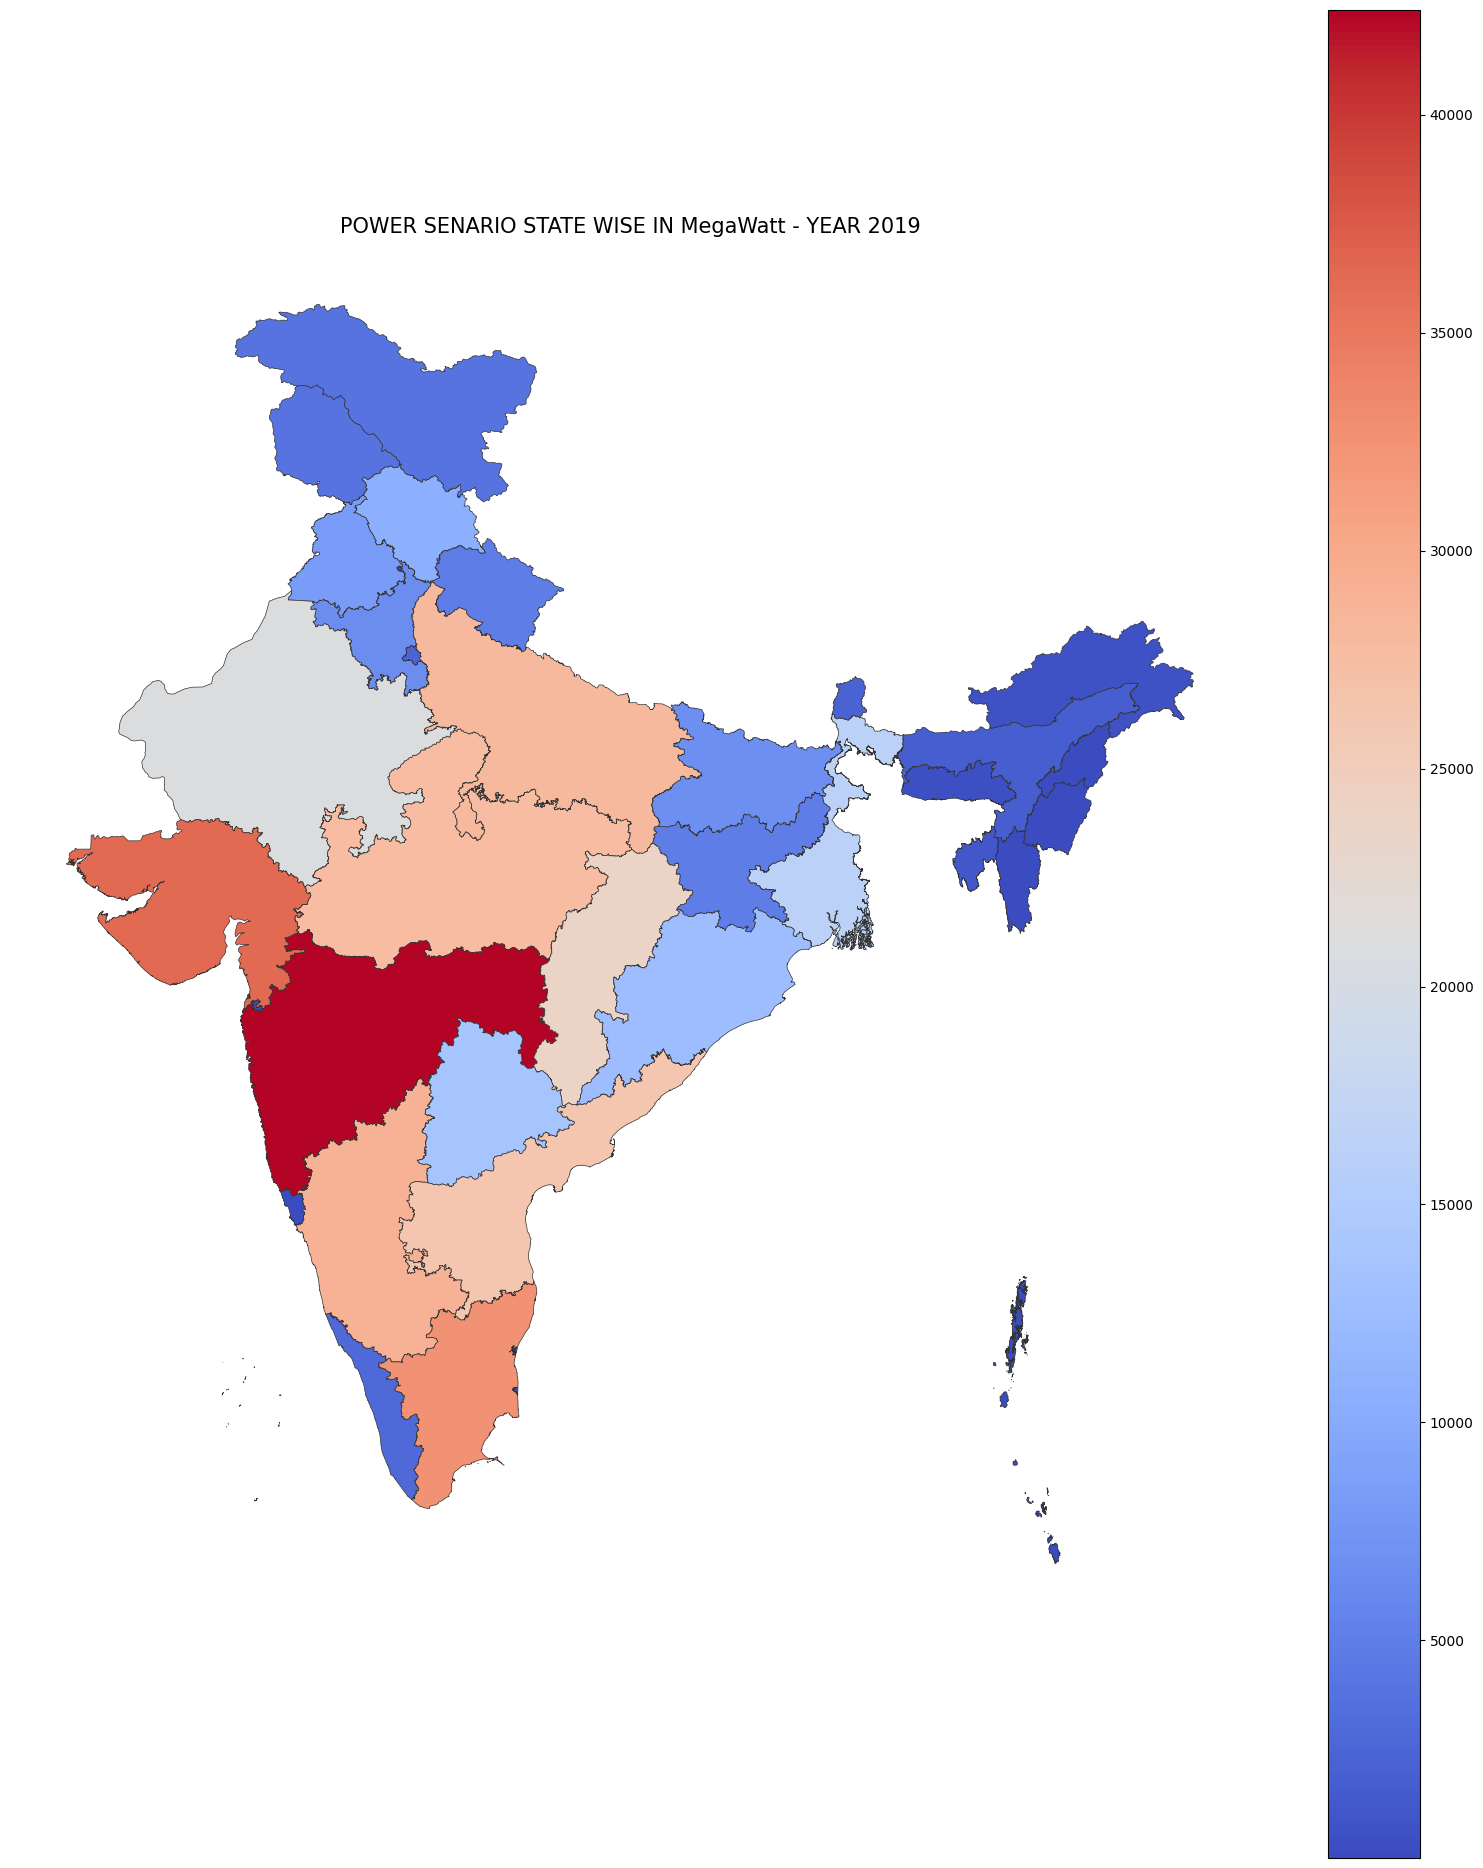

In [31]:
fig ,ax = plt.subplots(1,figsize=(20,24))
ax.axis('off')
ax.set_title("POWER SENARIO STATE WISE IN MegaWatt - YEAR 2019",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged.plot(column='grand_total' , cmap='coolwarm',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [32]:
shp_gdf.iloc[16,0] = 'Andhra Pradesh'
merged1 = shp_gdf.set_index('Name').join(tmp2.set_index('state'))
merged1.iloc[3,1] = 45.46

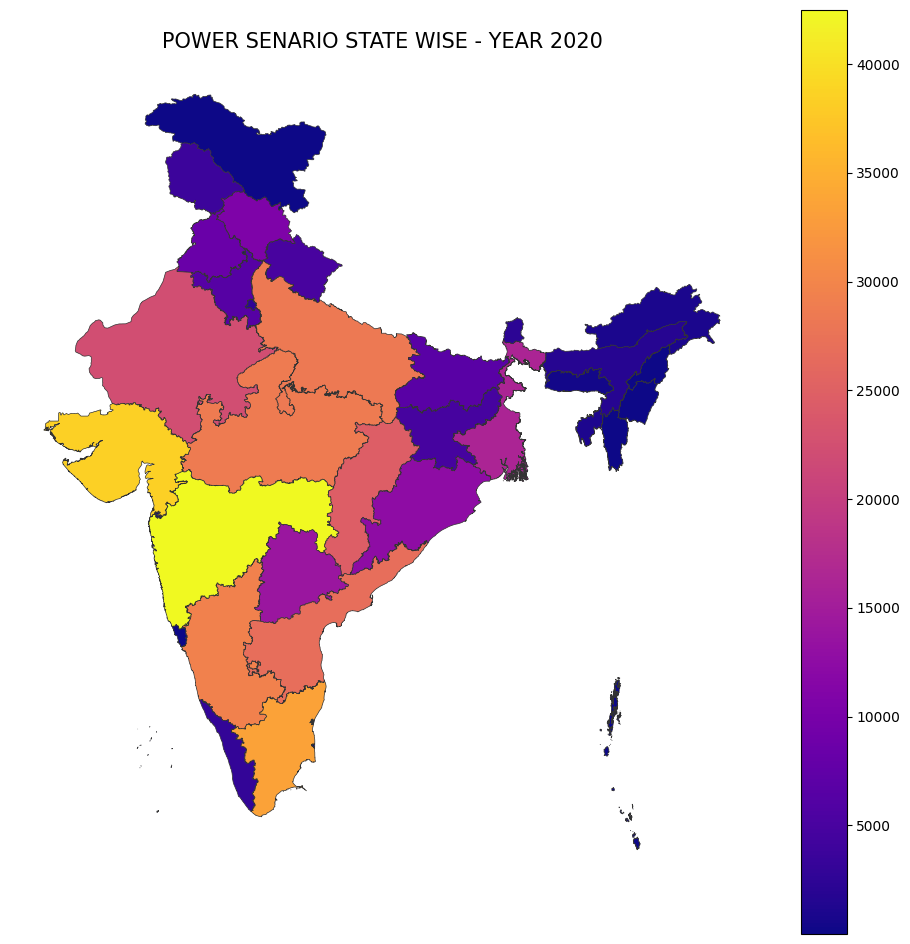

In [33]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("POWER SENARIO STATE WISE - YEAR 2020",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged1.plot(column='grand_total' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [34]:
merged2 = shp_gdf.set_index('Name').join(tmp3.set_index('state'))

In [35]:
merged2

,geometry,grand_total
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",16203.10
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",74.79
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",53.45
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",NaN
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",2471.52
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",6848.47
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",4556.42
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",29861.60
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",3184.45


In [36]:
tmp3

,state,grand_total
1281,Chandigarh,53.45
1282,Delhi,2471.52
1283,Haryana,6848.47
1284,Himachal Pradesh,11095.76
1285,Jammu and Kashmir,3726.55
1286,Ladakh,136.44
1287,Punjab,8542.41
1288,Rajasthan,27640.84
1289,Uttar Pradesh,30516.86
1290,Uttarakhand,5211.91


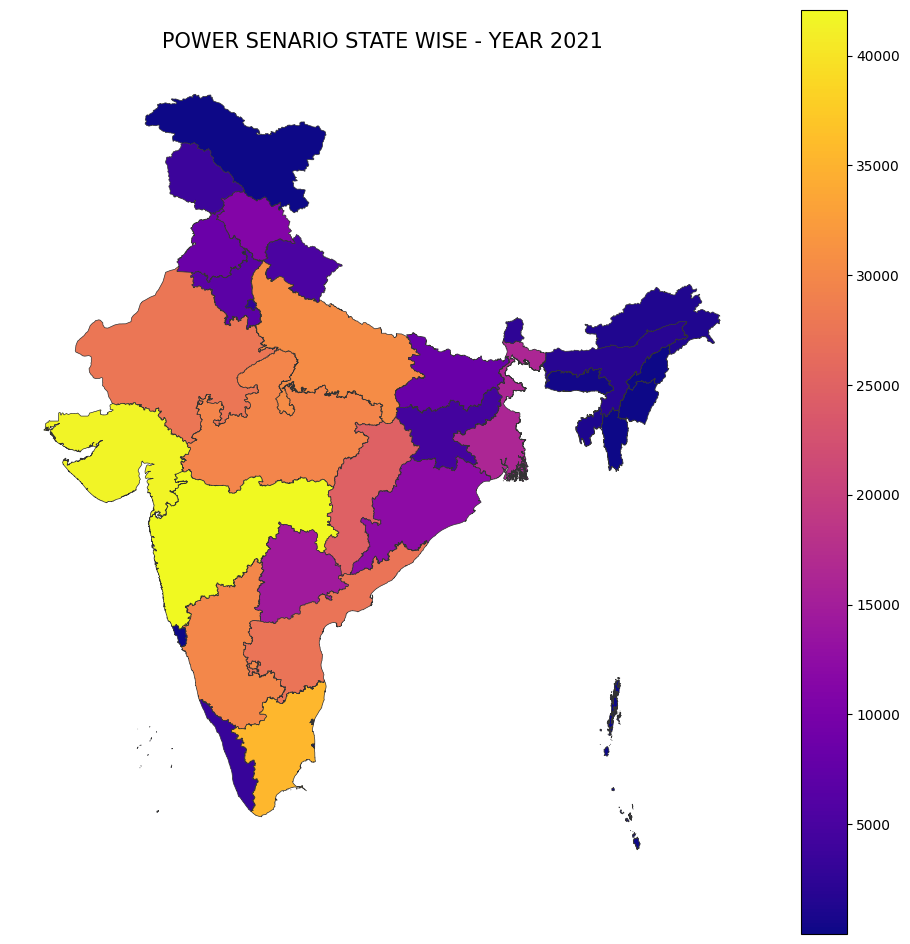

In [37]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("POWER SENARIO STATE WISE - YEAR 2021",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged2.plot(column='grand_total' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [38]:
hydro1 = hydro.iloc[396:432,:]
hydro2 = hydro.iloc[839:876,:]
hydro3 = hydro.iloc[1281:1317,:]
renewable1 = renewable.iloc[396:432,:]
renewable2 = renewable.iloc[839:876,:]
renewable3 = renewable.iloc[1281:1317,:]
nuclear1 = nuclear.iloc[396:432,:]
nuclear2 = nuclear.iloc[839:876,:]
nuclear3 = nuclear.iloc[1281:1317,:]
coal1 = coal.iloc[396:432,:]
coal2 = coal.iloc[839:876,:]
coal3 = coal.iloc[1281:1317,:]

In [39]:
hydro1

,state,hydro
396,Chandigarh,0.00
397,Delhi,0.00
398,Haryana,0.00
399,Himachal Pradesh,9809.02
400,Jammu and Kashmir,3449.00
401,Punjab,1096.30
402,Rajasthan,411.00
403,Uttar Pradesh,501.60
404,Uttarakhand,3756.35
405,Andaman & Nicobar Islands,0.00


In [40]:
merged_hydro = shp_gdf.set_index('Name').join(hydro1.set_index('state'))
merged_hydro.iloc[33,1] = 3449 # MAking Ladake same as J&K since one before 2020

In [41]:
merged_hydro.iloc[3,1] = 0

In [42]:
merged_hydro.iloc[16,1] = 1610.1

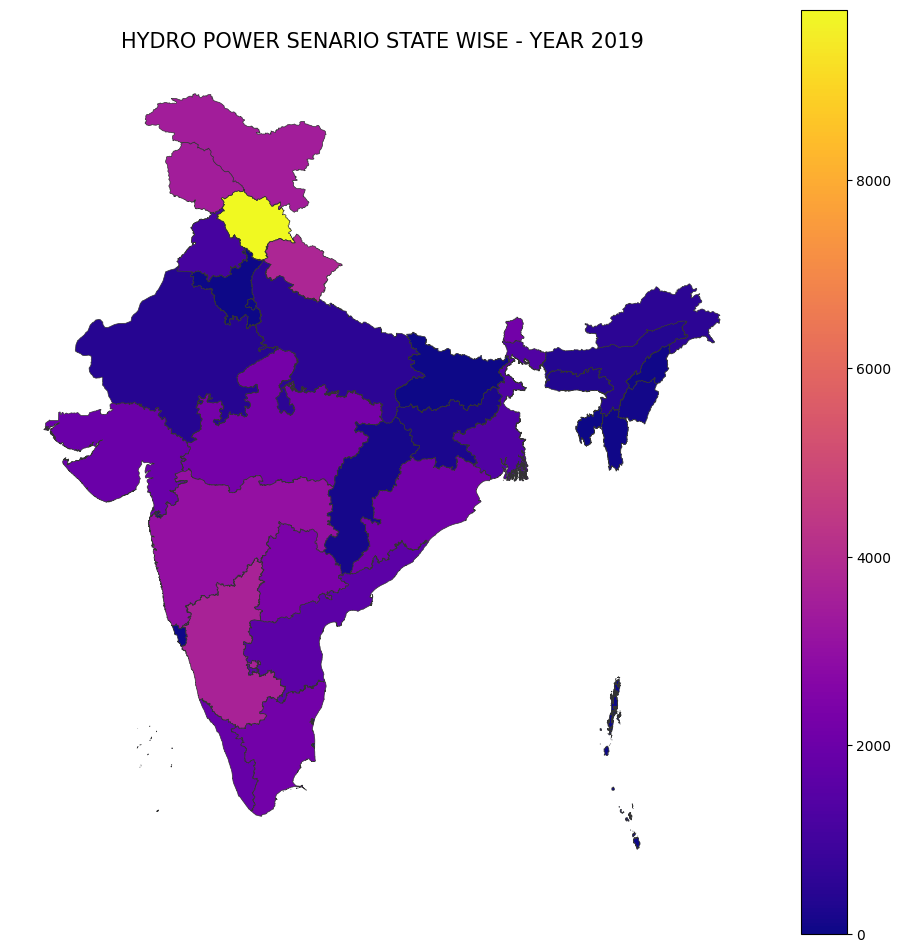

In [43]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("HYDRO POWER SENARIO STATE WISE - YEAR 2019",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_hydro.plot(column='hydro' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [44]:
merged_hydro_2 = shp_gdf.set_index('Name').join(hydro2.set_index('state'))
# merged_hydro.iloc[33,1] = 3449 # MAking Ladake same as J&K since one before 2020

In [45]:
merged_hydro_2.iloc[3,1] = 0
merged_hydro_2.iloc[16,1] = 1610

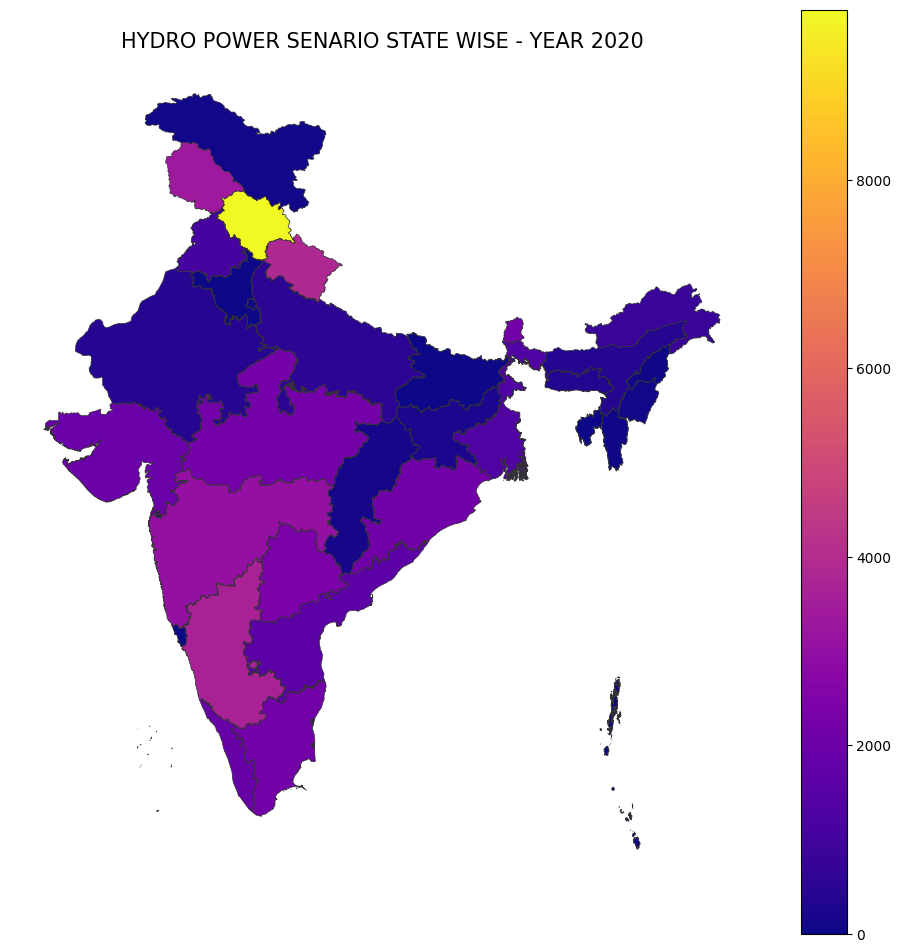

In [46]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("HYDRO POWER SENARIO STATE WISE - YEAR 2020",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_hydro_2.plot(column='hydro' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [47]:
merged_hydro_3 = shp_gdf.set_index('Name').join(hydro3.set_index('state'))

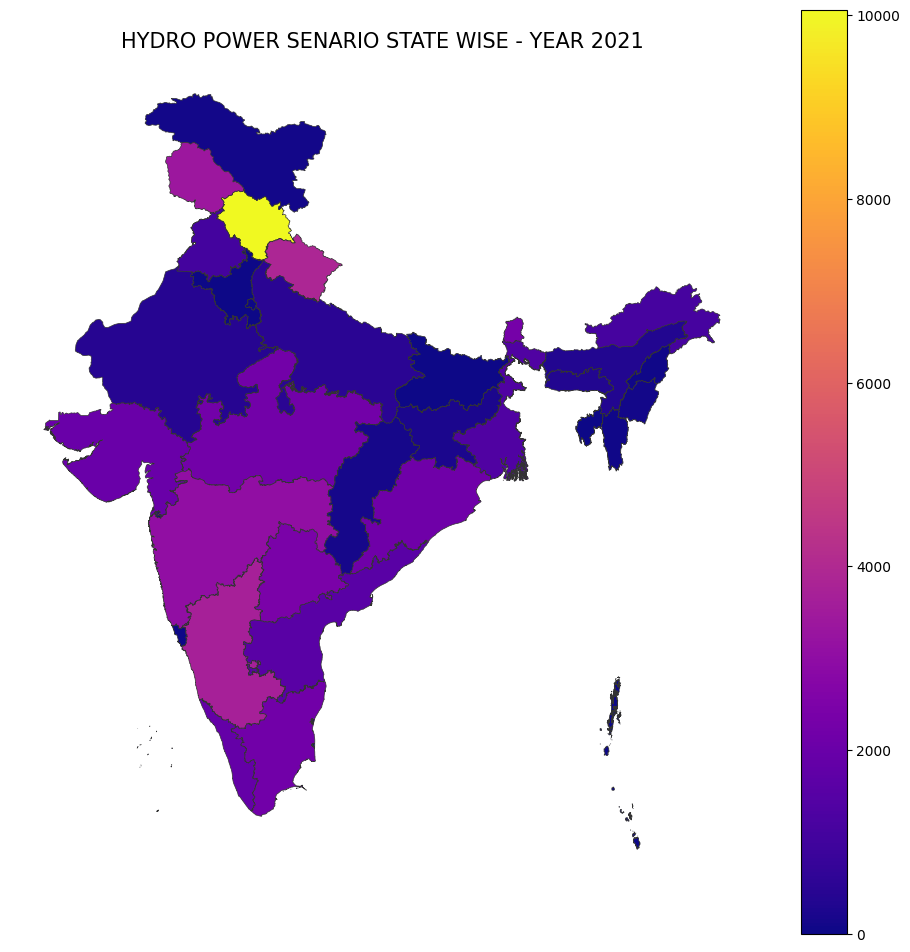

In [48]:
merged_hydro_3.iloc[3,1] = 0
merged_hydro_3.iloc[16,1] = 1610
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("HYDRO POWER SENARIO STATE WISE - YEAR 2021",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_hydro_3.plot(column='hydro' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [49]:
merged_rene_1 = shp_gdf.set_index('Name').join(renewable1.set_index('state'))
merged_rene_1.iloc[33,1] = 199.76 # MAking Ladake same as J&K since one before 2020
merged_rene_1.iloc[3,1] = 16.56

In [50]:
merged_rene_1

,geometry,res
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",527.29
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",17.44
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",36.99
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",16.56
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",200.41
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",527.72
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",46.75
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",15011.86
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",426.68


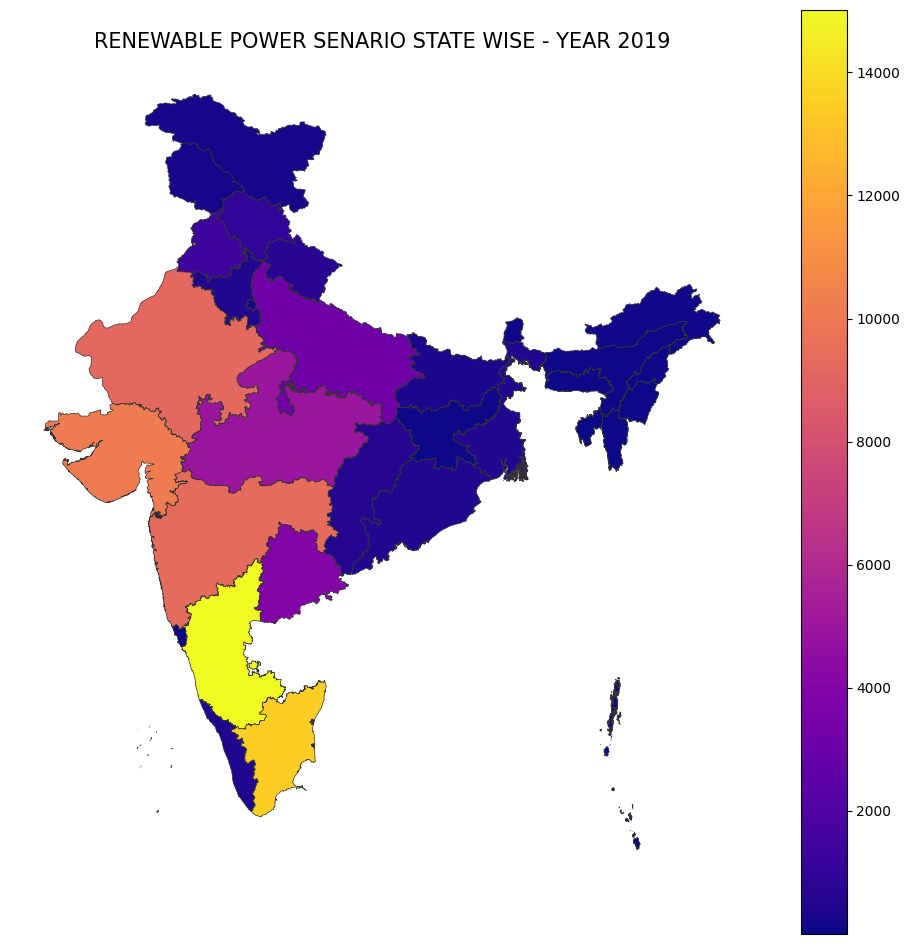

In [51]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("RENEWABLE POWER SENARIO STATE WISE - YEAR 2019",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_rene_1.plot(column='res' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [52]:
merged_rene_2 = shp_gdf.set_index('Name').join(renewable2.set_index('state'))
# merged_rene_1.iloc[33,1] = 199.76 # MAking Ladake same as J&K since one before 2020
merged_rene_2.iloc[3,1] = 5.46
merged_rene_2.iloc[16,1] =8605.56

In [53]:
merged_rene_2

,geometry,res
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",568.26
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",34.47
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",45.16
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",5.46
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",228.46
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",547.78
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",47.41
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",15366.70
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",433.71


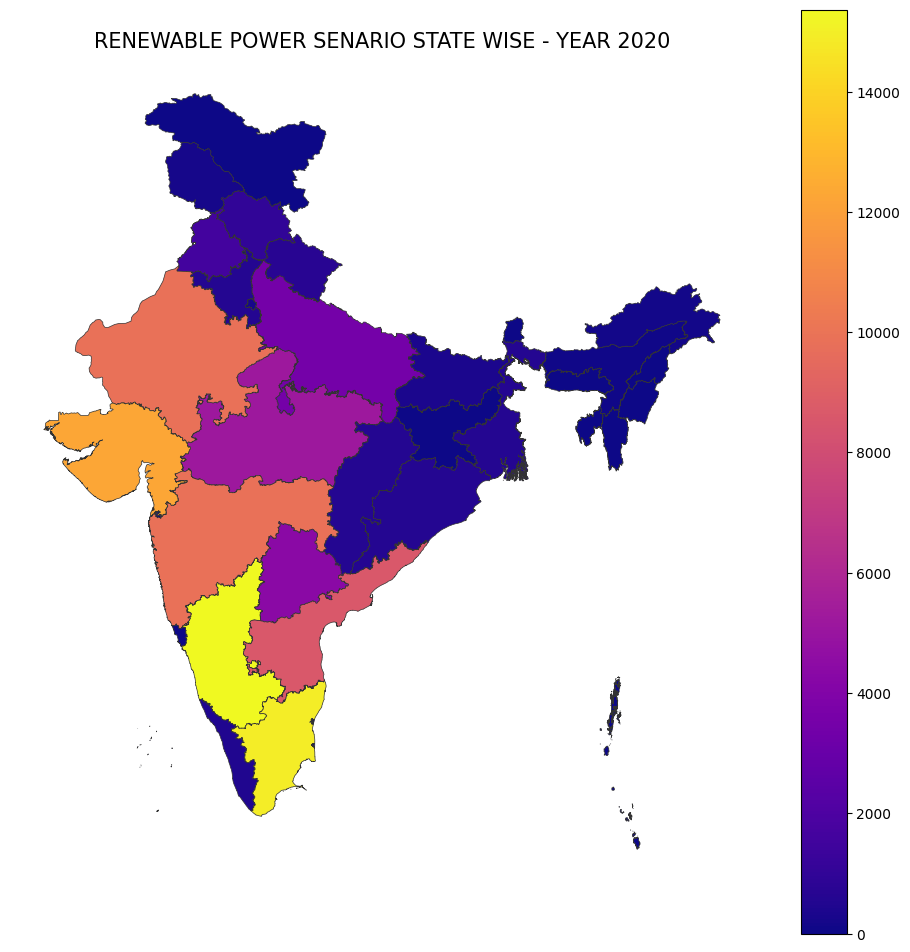

In [54]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("RENEWABLE POWER SENARIO STATE WISE - YEAR 2020",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_rene_2.plot(column='res' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [55]:
merged_rene_3 = shp_gdf.set_index('Name').join(renewable2.set_index('state'))
# merged_rene_1.iloc[33,1] = 199.76 # MAking Ladake same as J&K since one before 2020
merged_rene_3.iloc[3,1] = 46.18
merged_rene_3.iloc[16,1] =9190.51

In [56]:
merged_rene_3

,geometry,res
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",568.26
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",34.47
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",45.16
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",46.18
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",228.46
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",547.78
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",47.41
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",15366.70
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",433.71


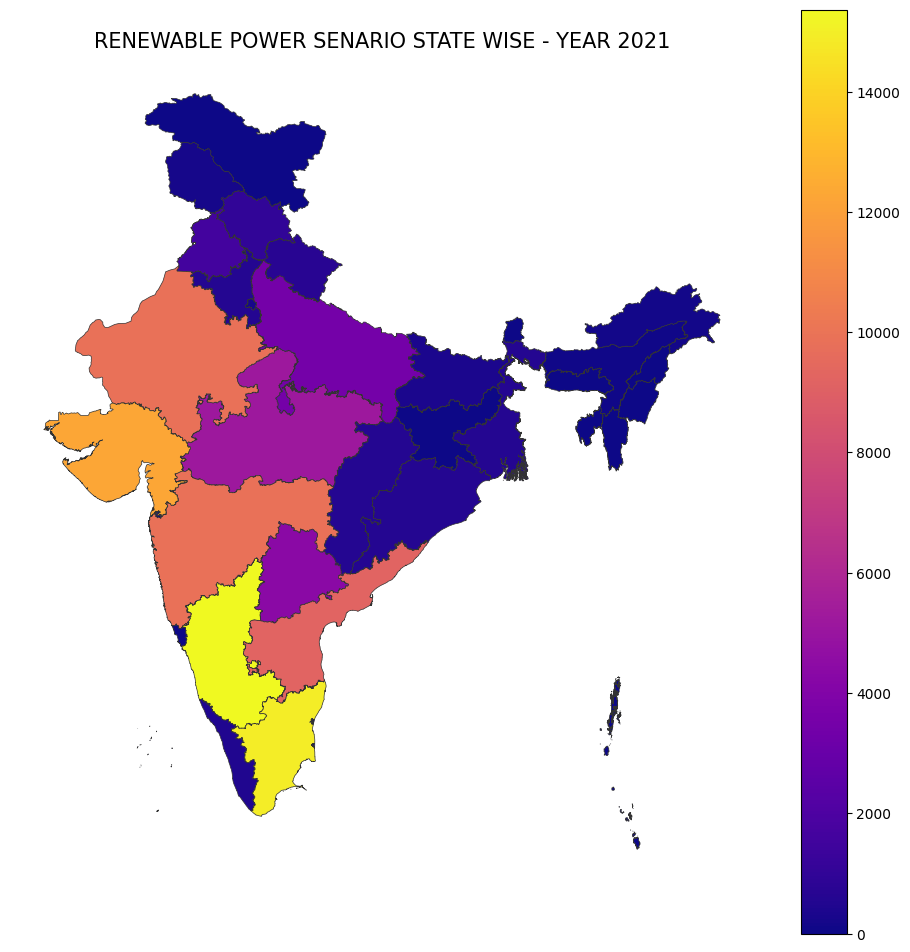

In [57]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("RENEWABLE POWER SENARIO STATE WISE - YEAR 2021",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_rene_3.plot(column='res' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [58]:
merged_nuclear_1 = shp_gdf.set_index('Name').join(nuclear1.set_index('state'))
merged_nuclear_1.iloc[33,1] = 0 # MAking Ladake same as J&K since one before 2020
merged_nuclear_1.iloc[3,1] = 0

In [59]:
nuclear1

,state,nuclear
396,Chandigarh,0.0
397,Delhi,0.0
398,Haryana,0.0
399,Himachal Pradesh,0.0
400,Jammu and Kashmir,0.0
401,Punjab,0.0
402,Rajasthan,1180.0
403,Uttar Pradesh,440.0
404,Uttarakhand,0.0
405,Andaman & Nicobar Islands,0.0


In [60]:
merged_nuclear_1

,geometry,nuclear
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",0.0
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",0.0
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",0.0
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",0.0
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",0.0
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",0.0
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",0.0
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",880.0
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",0.0


In [61]:
merged_nuclear_1.iloc[16,1] = 0.0

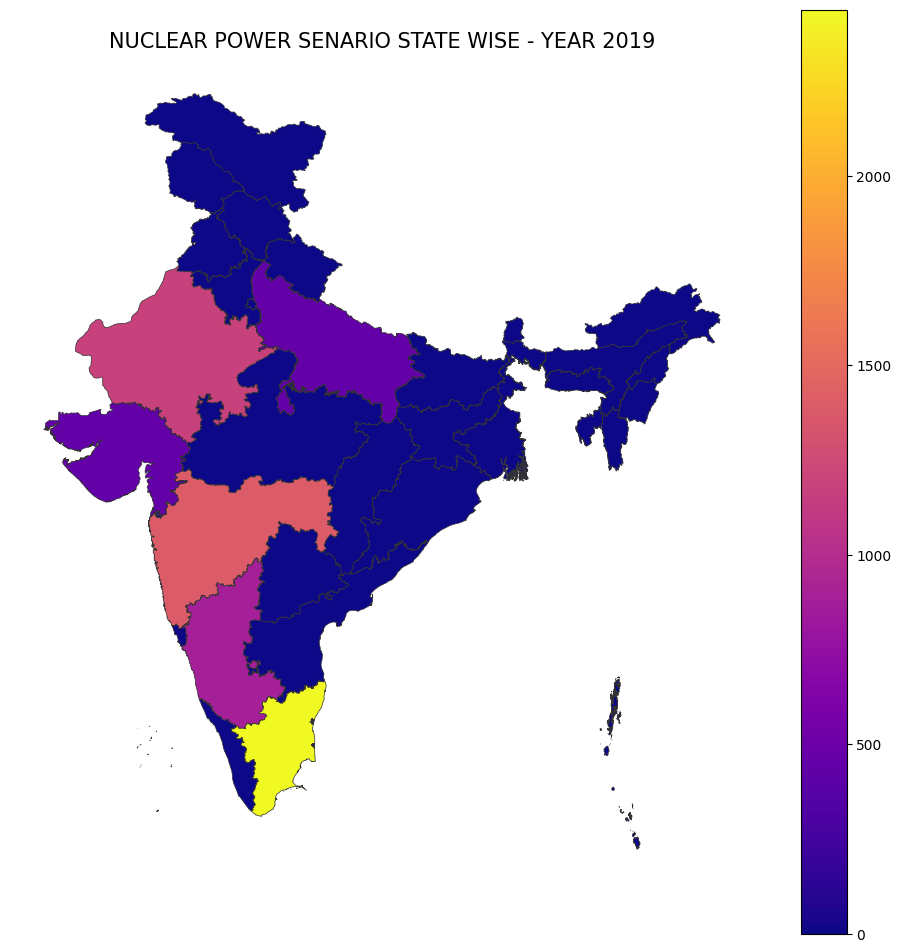

In [62]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("NUCLEAR POWER SENARIO STATE WISE - YEAR 2019",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_nuclear_1.plot(column='nuclear' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [63]:
merged_nuclear_2 = shp_gdf.set_index('Name').join(nuclear2.set_index('state'))
merged_nuclear_2.iloc[33,1] = 0 # MAking Ladake same as J&K since one before 2020
merged_nuclear_2.iloc[3,1] = 0
merged_nuclear_2.iloc[16,1] = 0
merged_nuclear_2

,geometry,nuclear
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",0.0
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",0.0
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",0.0
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",0.0
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",0.0
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",0.0
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",0.0
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",880.0
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",0.0


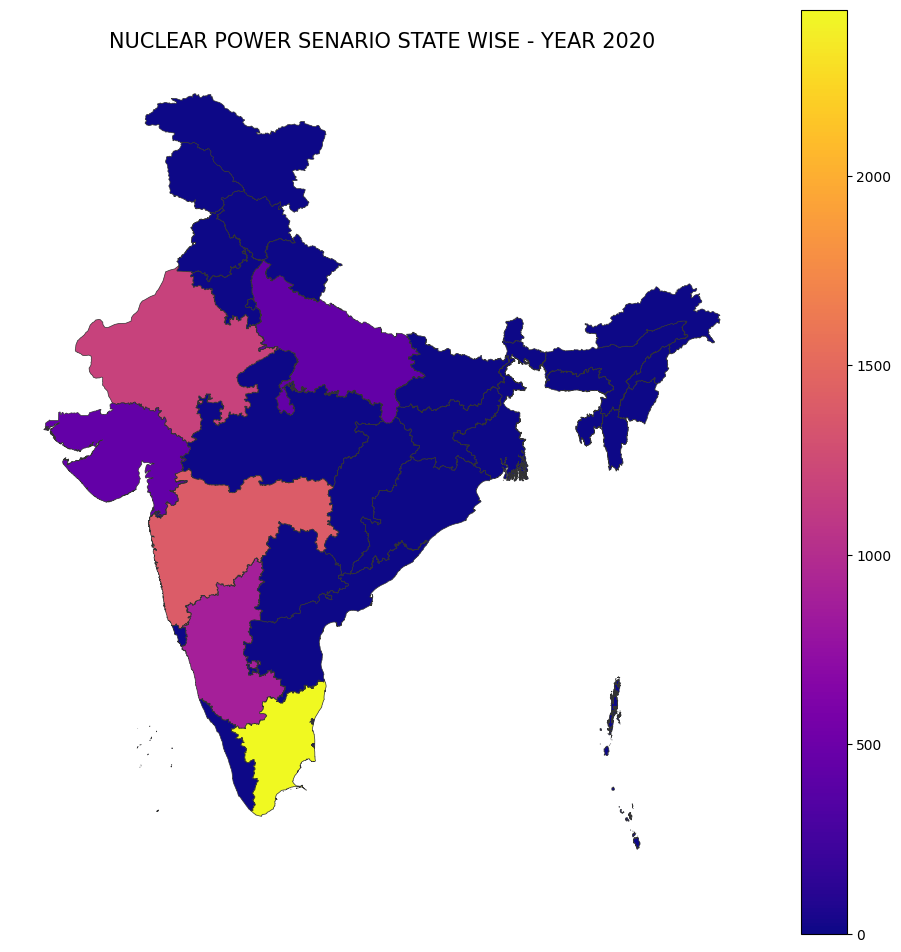

In [64]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("NUCLEAR POWER SENARIO STATE WISE - YEAR 2020",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_nuclear_2.plot(column='nuclear' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [65]:
merged_nuclear_3 = shp_gdf.set_index('Name').join(nuclear3.set_index('state'))
merged_nuclear_3.iloc[33,1] = 0 # MAking Ladake same as J&K since one before 2020
merged_nuclear_3.iloc[3,1] = 0
merged_nuclear_3.iloc[16,1] = 0
merged_nuclear_3

,geometry,nuclear
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",0.0
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",0.0
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",0.0
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",0.0
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",0.0
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",0.0
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",0.0
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",880.0
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",0.0


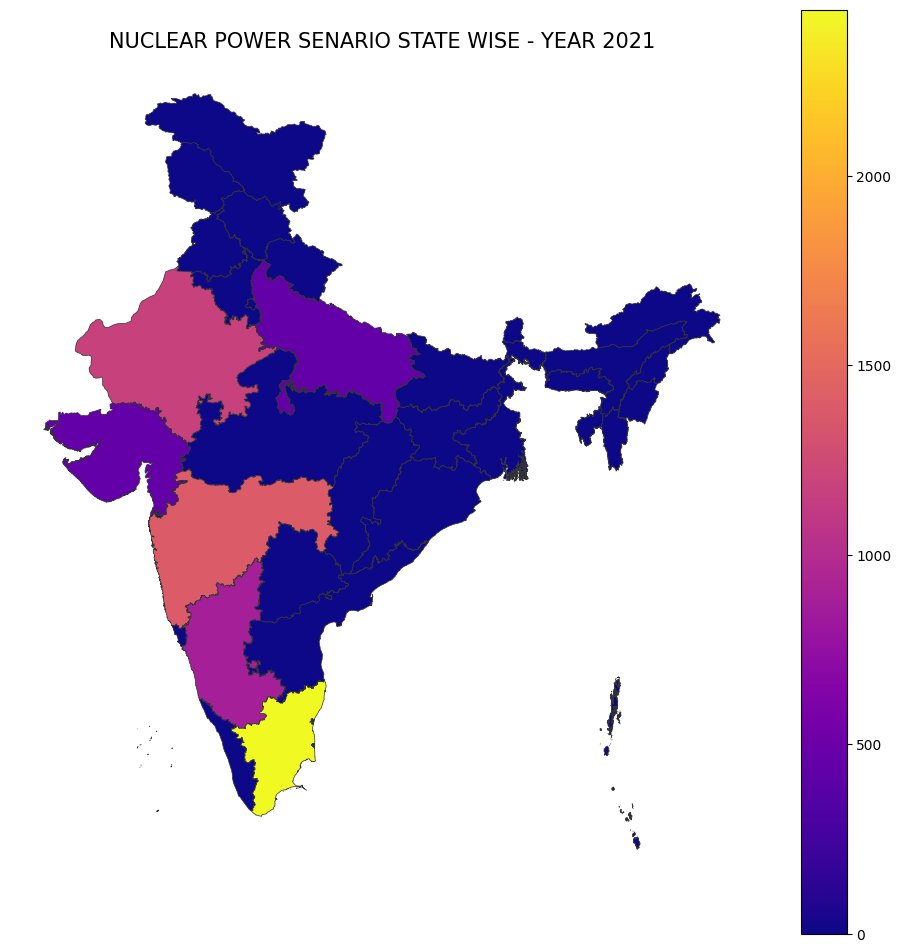

In [66]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("NUCLEAR POWER SENARIO STATE WISE - YEAR 2021",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_nuclear_3.plot(column='nuclear' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [67]:
merged_coal_1 = shp_gdf.set_index('Name').join(coal1.set_index('state'))
merged_coal_1.iloc[33,1] = 0 # MAking Ladake same as J&K since one before 2020
merged_coal_1.iloc[3,1] = 0

In [68]:
coal1

,state,coal
396,Chandigarh,0.0
397,Delhi,0.0
398,Haryana,5540.0
399,Himachal Pradesh,0.0
400,Jammu and Kashmir,0.0
401,Punjab,5680.0
402,Rajasthan,9160.0
403,Uttar Pradesh,22409.0
404,Uttarakhand,0.0
405,Andaman & Nicobar Islands,0.0


In [69]:
merged_coal_1

,geometry,coal
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",14287.0
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",0.0
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",0.0
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",0.0
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",0.0
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",5540.0
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",4590.0
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",9480.0
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",0.0


In [70]:
merged_coal_1.iloc[16,1] = 11590

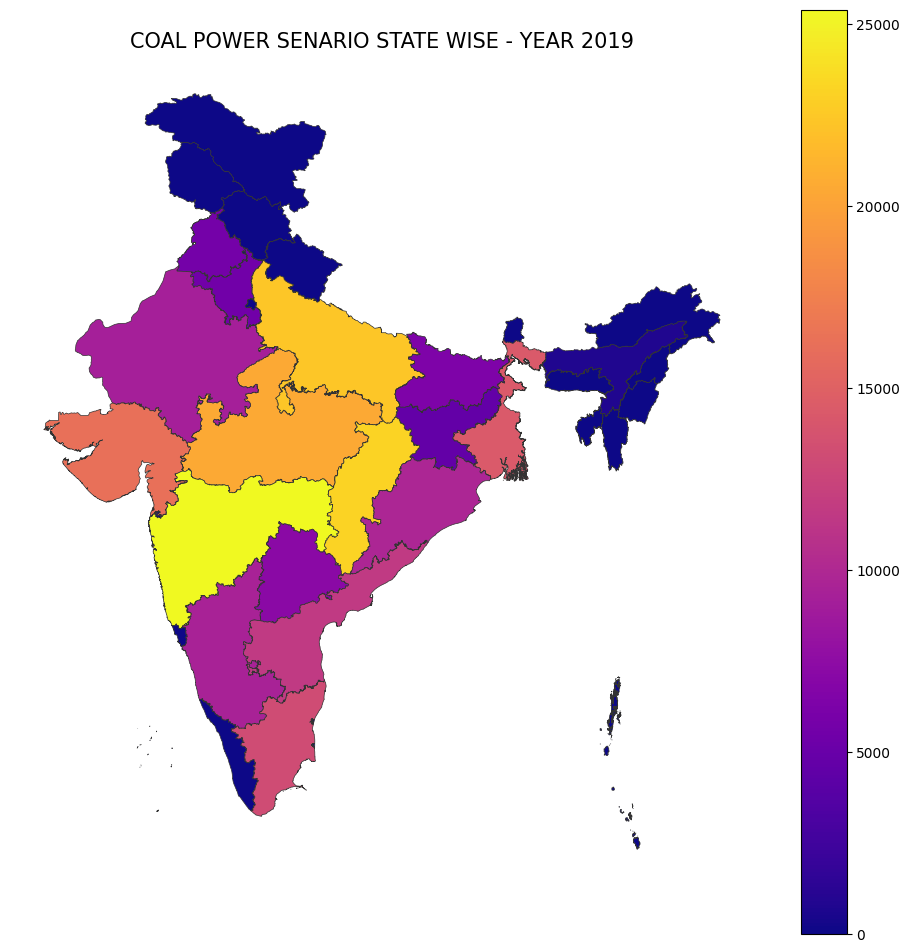

In [71]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("COAL POWER SENARIO STATE WISE - YEAR 2019",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_coal_1.plot(column='coal' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [72]:
merged_coal_2 = shp_gdf.set_index('Name').join(coal2.set_index('state'))
# merged_coal_2.iloc[33,1] = 0 # MAking Ladake same as J&K since one before 2020
merged_coal_2.iloc[3,1] = 0
merged_coal_2.iloc[16,1] = 11590

In [73]:
merged_coal_2

,geometry,coal
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",14177.0
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",0.0
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",0.0
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",0.0
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",0.0
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",5330.0
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",4460.0
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",9480.0
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",0.0


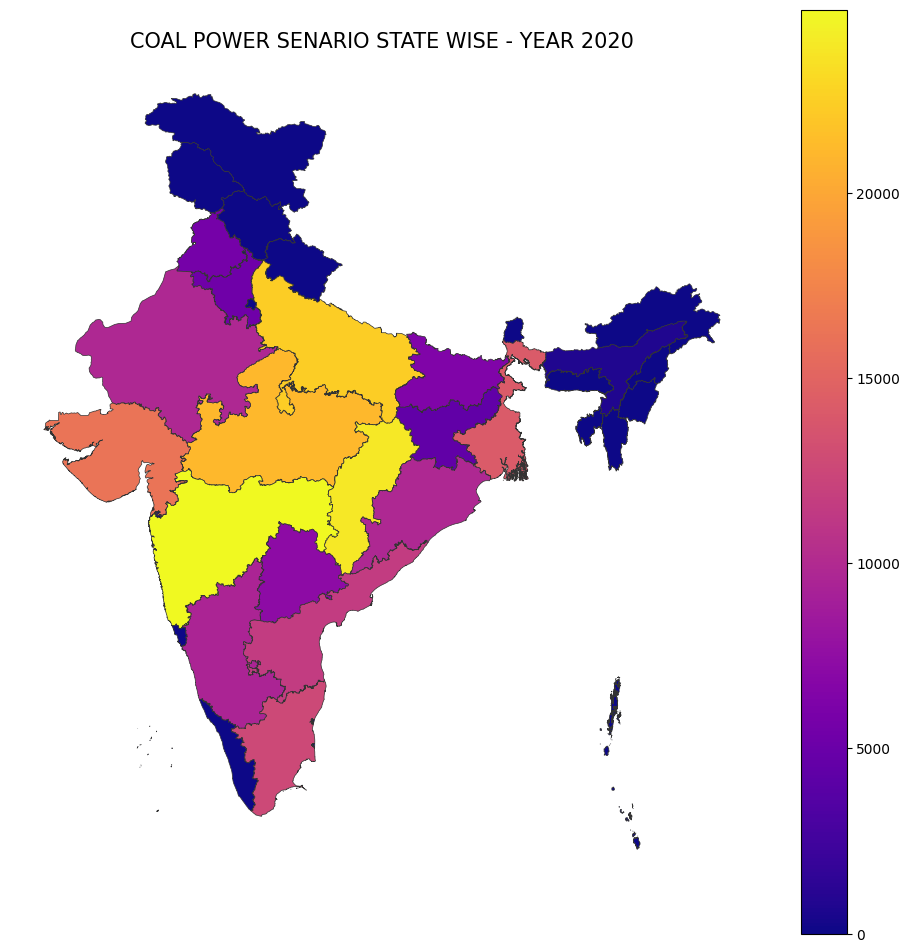

In [74]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("COAL POWER SENARIO STATE WISE - YEAR 2020",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_coal_2.plot(column='coal' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [75]:
merged_coal_3 = shp_gdf.set_index('Name').join(coal3.set_index('state'))
# merged_coal_2.iloc[33,1] = 0 # MAking Ladake same as J&K since one before 2020
merged_coal_3.iloc[3,1] = 0
merged_coal_3.iloc[16,1] = 11590

In [76]:
merged_coal_3

,geometry,coal
Name,,
West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",14177.0
Andaman & Nicobar Islands,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",0.0
Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",0.0
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",0.0
Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",0.0
Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",5330.0
Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",4250.0
Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",9480.0
Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",0.0


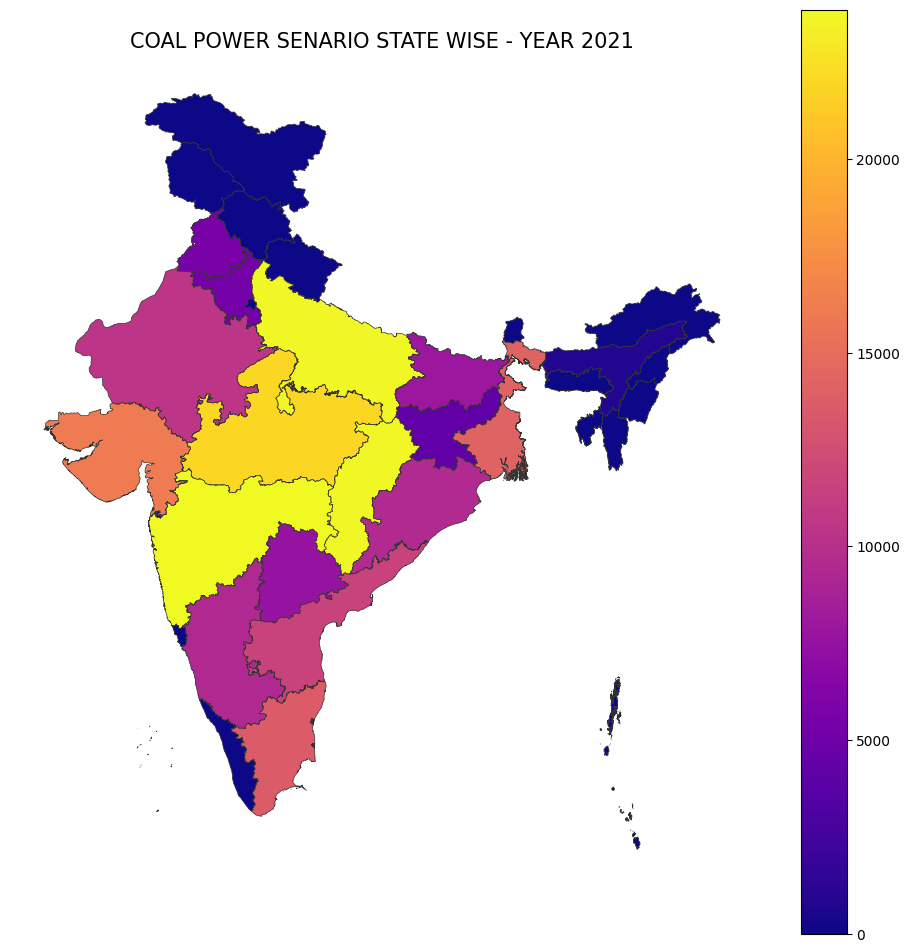

In [77]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("COAL POWER SENARIO STATE WISE - YEAR 2021",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_coal_3.plot(column='coal' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [78]:
df1.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [79]:
type(df1.iloc[1,4])

str

In [80]:
df1["Thermal Generation Actual (in MU)"] = df1["Thermal Generation Actual (in MU)"].replace(',', '', regex=True).astype(float)
df1["Thermal Generation Actual (in MU)"] = df1["Thermal Generation Actual (in MU)"].astype(float)
df1["Thermal Generation Estimated (in MU)"] = df1["Thermal Generation Estimated (in MU)"].replace(',', '', regex=True).astype(float)
df1["Thermal Generation Estimated (in MU)"] = df1["Thermal Generation Estimated (in MU)"].astype(float)

In [81]:
input_format = '%Y/%m/%d'
output_format = '%Y/%B/%d'

# Convert date column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format=input_format)

# Define lambda function to format dates
format_date = lambda date: datetime.datetime.strftime(date, output_format)

# Apply lambda function to date column and store as new column
df1['Formatted Date'] = df1['Date'].apply(format_date)

# Display DataFrame with formatted dates
df1.fillna(0,inplace=True)
df1["date"] = pd.to_datetime(df1["Formatted Date"])


In [82]:
df_monthly_mean = df1.groupby(pd.Grouper(key='date', freq='M'))['Thermal Generation Actual (in MU)'].mean()

In [83]:
year_2017 = df1.iloc[0:605,:]
year_2018 = df1.iloc[605:2425,:]
year_2019 = df1.iloc[2426:4250,:]

In [84]:
print(type(year_2018.iloc[1,1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [85]:
year_2018.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Formatted Date,date
605,605,2018-01-01,Northern,626.60,625.16,30.31,32.09,96.18,110.00,2018/January/01,2018-01-01
606,606,2018-01-01,Western,1127.88,1152.31,25.19,26.14,41.22,19.88,2018/January/01,2018-01-01
607,607,2018-01-01,Southern,638.77,556.72,45.38,72.80,70.04,42.45,2018/January/01,2018-01-01
608,608,2018-01-01,Eastern,478.58,435.94,0.00,0.00,21.76,21.87,2018/January/01,2018-01-01
609,609,2018-01-01,NorthEastern,31.88,35.76,0.00,0.00,11.28,8.56,2018/January/01,2018-01-01


In [86]:
northern_year_2018 = year_2018[year_2018["Region"]=="Northern"]
eastern_year_2018 = year_2018[year_2018["Region"]=="Eastern"]
western_year_2018 = year_2018[year_2018["Region"]=="Western"]
southern_year_2018 = year_2018[year_2018["Region"]=="Southern"]
north_eastern_year_2018 = year_2018[year_2018["Region"]=="NorthEastern"]

In [87]:
type(northern_year_2018.iloc[1,1])

pandas._libs.tslibs.timestamps.Timestamp

In [88]:
df_monthly_mean_north = northern_year_2018.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()
df_monthly_mean_east = eastern_year_2018.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()
df_monthly_mean_west = western_year_2018.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()
df_monthly_mean_south = southern_year_2018.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()
df_monthly_mean_north_east = north_eastern_year_2018.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()

In [89]:
l = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [90]:
df_monthly_mean_east["Month"] =l
df_monthly_mean_north["Month"] = l
df_monthly_mean_south["Month"] =l
df_monthly_mean_west["Month"] = l
df_monthly_mean_north_east["Month"] = l
df_monthly_mean_east["Region"] = ["Eastern"]*12
df_monthly_mean_north["Region"] = ["Northern"]*12
df_monthly_mean_south["Region"] = ["Southern"]*12
df_monthly_mean_west["Region"] = ["Western"]*12
df_monthly_mean_north_east["Region"] = ["NorthEastern"]*12

In [91]:
df_monthly_mean_east

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Month,Region
date,,,,,,,,
2018-01-31,485.579032,472.515484,0.0,0.0,21.76,22.392903,January,Eastern
2018-02-28,489.607143,510.174286,0.0,0.0,25.10,24.020000,February,Eastern
2018-03-31,502.462581,529.025806,0.0,0.0,30.16,27.659032,March,Eastern
2018-04-30,464.347333,521.312000,0.0,0.0,39.12,36.087333,April,Eastern
2018-05-31,471.855161,504.389677,0.0,0.0,46.26,55.939677,May,Eastern
2018-06-30,469.443000,481.531667,0.0,0.0,53.41,67.852000,June,Eastern
2018-07-31,448.081613,457.559355,0.0,0.0,69.16,67.558387,July,Eastern
2018-08-31,430.125667,438.584333,0.0,0.0,77.99,76.694667,August,Eastern
2018-09-30,445.378667,422.011667,0.0,0.0,79.00,90.680667,September,Eastern


In [92]:
merged_pd = pd.concat([df_monthly_mean_east,df_monthly_mean_west,df_monthly_mean_north,df_monthly_mean_south,df_monthly_mean_north_east],axis=0,ignore_index=True)

In [93]:
merged_pd

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Month,Region
0,485.579032,472.515484,0.000000,0.000000,21.76,22.392903,January,Eastern
1,489.607143,510.174286,0.000000,0.000000,25.10,24.020000,February,Eastern
2,502.462581,529.025806,0.000000,0.000000,30.16,27.659032,March,Eastern
3,464.347333,521.312000,0.000000,0.000000,39.12,36.087333,April,Eastern
4,471.855161,504.389677,0.000000,0.000000,46.26,55.939677,May,Eastern
5,469.443000,481.531667,0.000000,0.000000,53.41,67.852000,June,Eastern
6,448.081613,457.559355,0.000000,0.000000,69.16,67.558387,July,Eastern
7,430.125667,438.584333,0.000000,0.000000,77.99,76.694667,August,Eastern
8,445.378667,422.011667,0.000000,0.000000,79.00,90.680667,September,Eastern
9,484.378387,453.946129,0.000000,0.000000,55.26,70.809032,October,Eastern


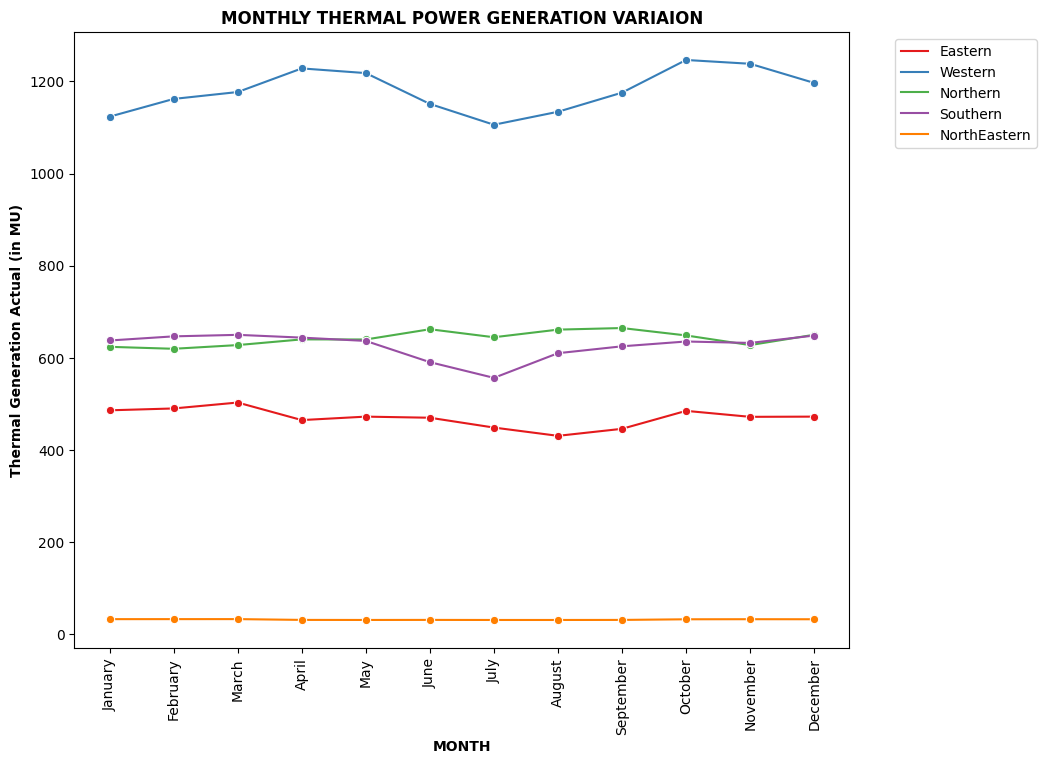

In [94]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Thermal Generation Actual (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY THERMAL POWER GENERATION VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Thermal Generation Actual (in MU)",fontweight="bold")

plt.show()

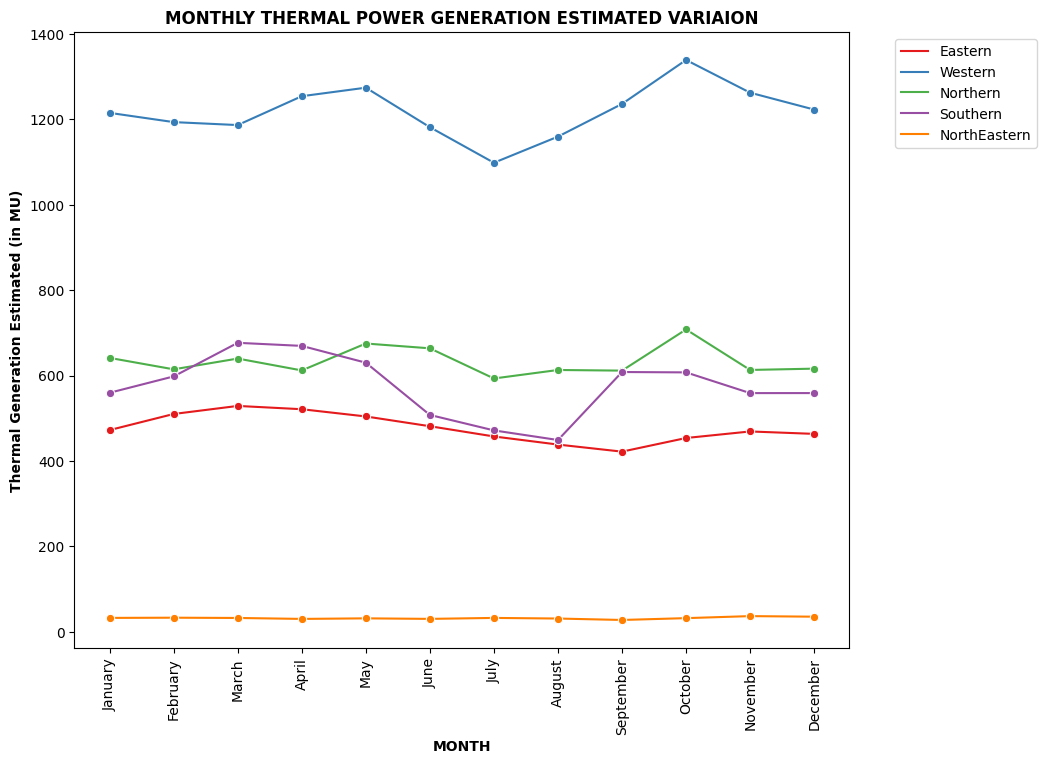

In [95]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Thermal Generation Estimated (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY THERMAL POWER GENERATION ESTIMATED VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Thermal Generation Estimated (in MU)",fontweight="bold")
plt.show()

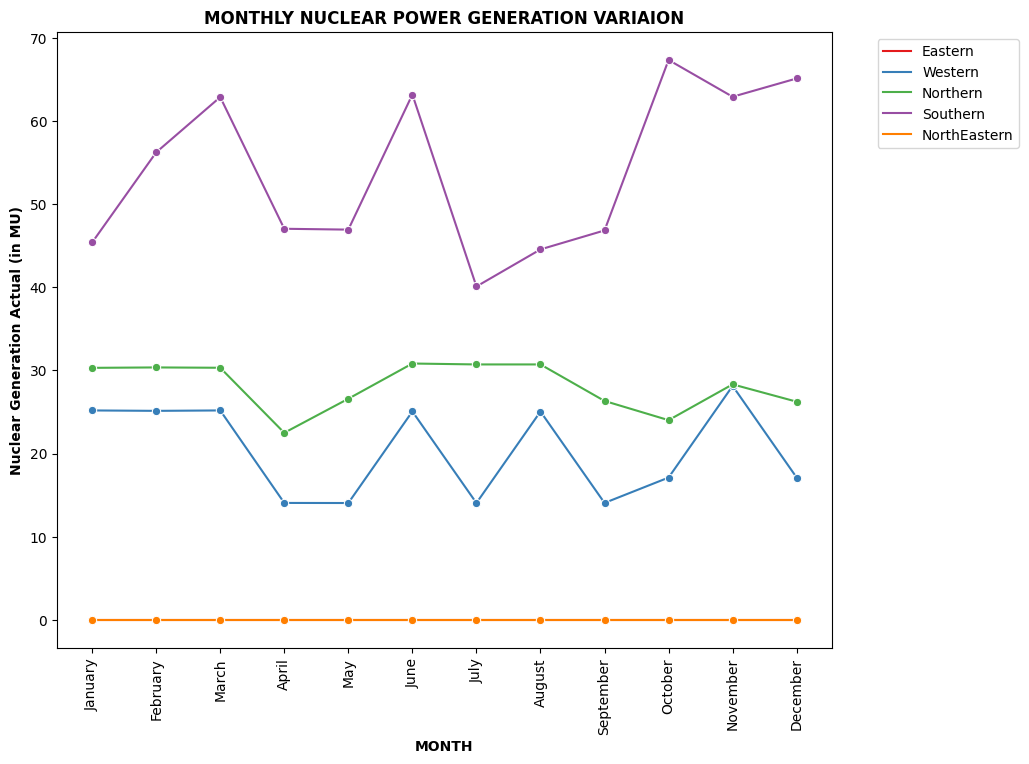

In [96]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Nuclear Generation Actual (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY NUCLEAR POWER GENERATION VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Nuclear Generation Actual (in MU)",fontweight="bold")
plt.show()

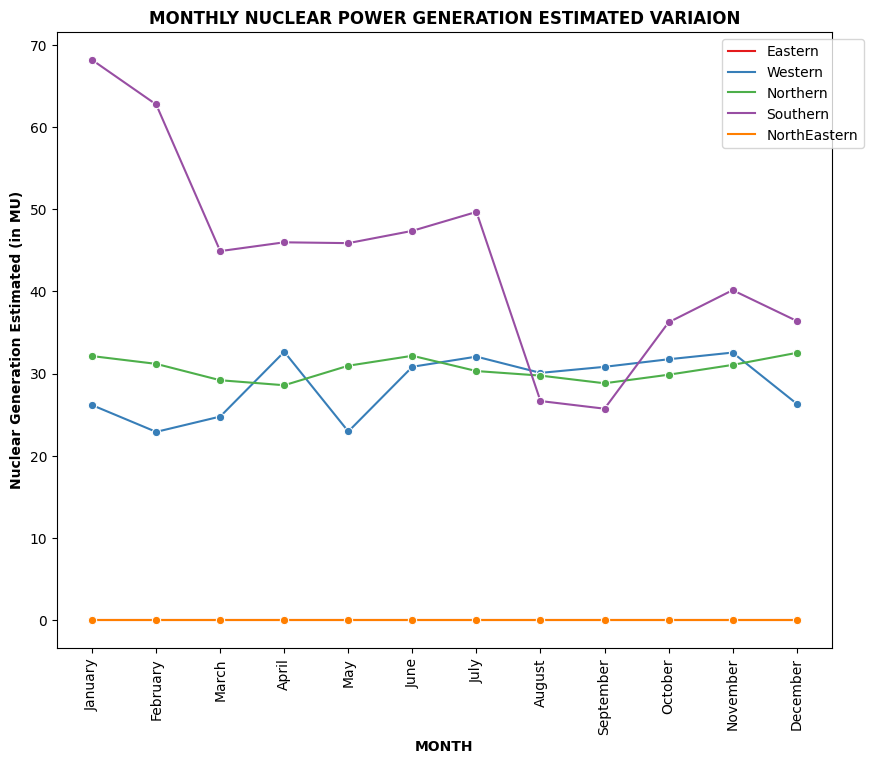

In [97]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Nuclear Generation Estimated (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY NUCLEAR POWER GENERATION ESTIMATED VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Nuclear Generation Estimated (in MU)",fontweight="bold")
plt.show()

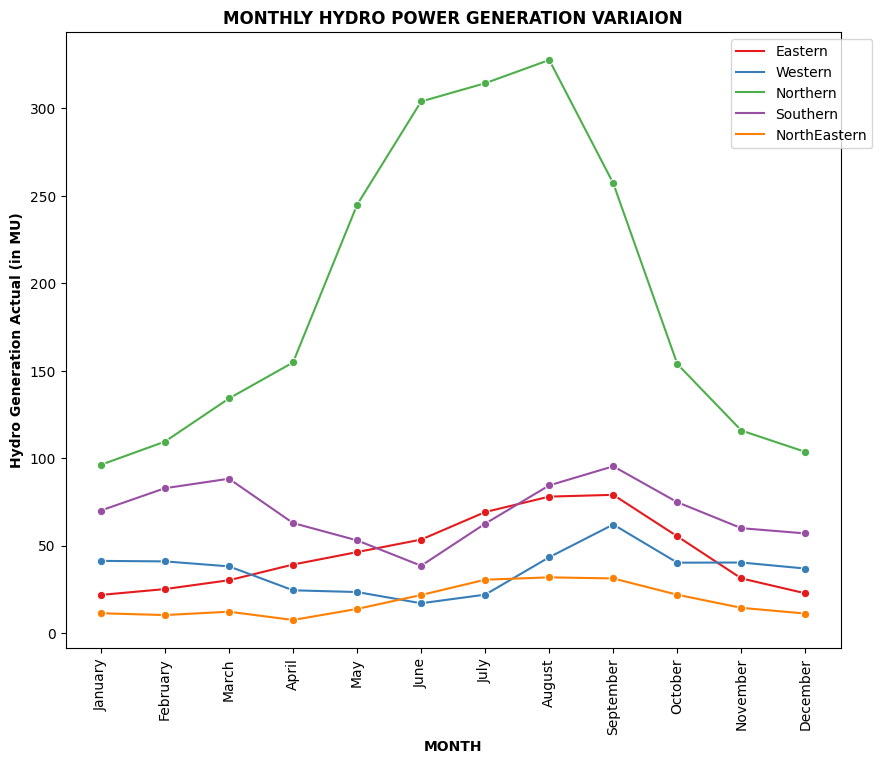

In [98]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Hydro Generation Actual (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY HYDRO POWER GENERATION VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Hydro Generation Actual (in MU)",fontweight="bold")
plt.show()

C:\Users\my hp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


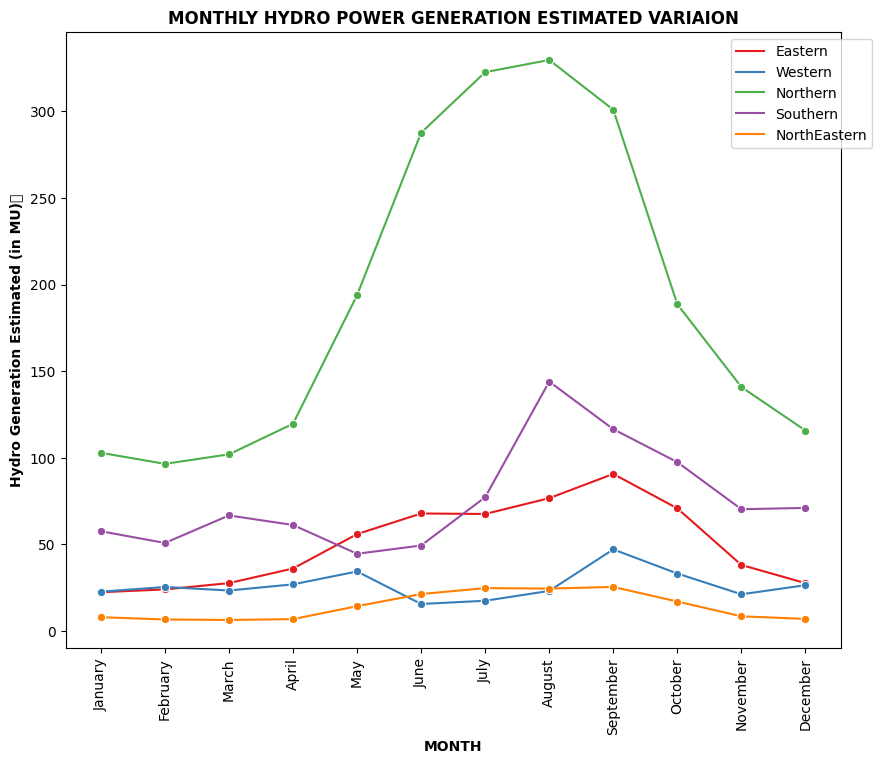

In [99]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Hydro Generation Estimated (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY HYDRO POWER GENERATION ESTIMATED VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Hydro Generation Estimated (in MU)	",fontweight="bold")
plt.show()

In [100]:
df2.head(28)

,GROSS STATE DOMESTIC PRODUCT AT CONSTANT (2011-12) PRICES; BASE YEAR 2011-12,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,As on 15.03.2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,GSDP - CONSTANT PRICES (in Crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S. No.,State\UT,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,...,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
4,(1),(2),(3),(4),(5),(6),(7),(8'),(9),(10),...,(16),(17),(18),(19),(20),(21),(22),(23),(24),(25)
5,1,Andhra Pradesh,379402,380629,407115,444564,498606,540212,594737,626614,...,6.96,9.20,12.16,8.34,10.09,5.36,3.70,-2.48,11.23,7.02
6,2,Arunachal Pradesh,11063,11299,12339,14383,14240,14893,15572,16668,...,9.21,16.56,-0.99,4.58,4.56,7.04,14.81,-2.84,9.10,NaN
7,3,Assam,143175,147342,154525,165212,191109,202081,219919,231040,...,4.88,6.92,15.67,5.74,8.83,5.06,4.18,0.93,8.06,10.16
8,4,Bihar,247144,256851,269650,279482,296488,318797,344028,381383,...,4.98,3.65,6.08,7.52,7.91,10.86,4.43,-3.15,10.98,NaN
9,5,Chhattisgarh,158074,165977,182580,185813,190584,213705,220136,244579,...,10.00,1.77,2.57,12.13,3.01,11.10,2.76,-1.80,8.46,8.00


In [101]:
df2 = df2.iloc[3:,:]

In [102]:
df2.head(25)

,GROSS STATE DOMESTIC PRODUCT AT CONSTANT (2011-12) PRICES; BASE YEAR 2011-12,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
3,S. No.,State\UT,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,...,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
4,(1),(2),(3),(4),(5),(6),(7),(8'),(9),(10),...,(16),(17),(18),(19),(20),(21),(22),(23),(24),(25)
5,1,Andhra Pradesh,379402,380629,407115,444564,498606,540212,594737,626614,...,6.96,9.20,12.16,8.34,10.09,5.36,3.70,-2.48,11.23,7.02
6,2,Arunachal Pradesh,11063,11299,12339,14383,14240,14893,15572,16668,...,9.21,16.56,-0.99,4.58,4.56,7.04,14.81,-2.84,9.10,NaN
7,3,Assam,143175,147342,154525,165212,191109,202081,219919,231040,...,4.88,6.92,15.67,5.74,8.83,5.06,4.18,0.93,8.06,10.16
8,4,Bihar,247144,256851,269650,279482,296488,318797,344028,381383,...,4.98,3.65,6.08,7.52,7.91,10.86,4.43,-3.15,10.98,NaN
9,5,Chhattisgarh,158074,165977,182580,185813,190584,213705,220136,244579,...,10.00,1.77,2.57,12.13,3.01,11.10,2.76,-1.80,8.46,8.00
10,6,Goa,42367,35850,31568,40116,46091,51249,52653,53063,...,-11.94,27.08,14.89,11.19,2.74,0.78,3.30,-2.65,4.10,NaN
11,7,Gujarat,615606,682650,734284,811428,894465,981342,1086570,1183020,...,7.56,10.51,10.23,9.71,10.72,8.88,6.95,-1.35,10.76,NaN
12,8,Haryana,297539,320912,347507,370535,413405,456709,482036,532996,...,8.29,6.63,11.57,10.48,5.55,10.57,2.12,-6.24,11.32,7.10


In [103]:
df_req = df2.iloc[:,9:12]
df_req1 = df2.iloc[:,1]

In [104]:
df_re = pd.concat([df_req,df_req1],axis=1,ignore_index=True)

In [105]:
df_re.fillna(0)

,0,1,2,3
3,2018-19,2019-20,2020-21,State\UT
4,(10),(11),(12),(2)
5,626614,649810,633720,Andhra Pradesh
6,16668,19137,18592,Arunachal Pradesh
7,231040,240707,242946,Assam
8,381383,398283,385728,Bihar
9,244579,251325,246804,Chhattisgarh
10,53063,54812,53360,Goa
11,1183020,1265277,1248189,Gujarat
12,532996,544275,510306,Haryana


In [106]:
df_re = df_re.iloc[2:35,:]

In [107]:
df_re.columns  

RangeIndex(start=0, stop=4, step=1)

In [108]:
df_re.columns = ["2019","2020","2021","state"]

In [109]:
df_re["2019"] = df_re["2019"].astype(float)
df_re["2020"] = df_re["2020"].astype(float)
df_re["2021"] = df_re["2021"].astype(float)

In [110]:
shp_gdf = gpd.read_file("C:\\Users\\my hp\\Desktop\\Data_Visulization\\Power\\Power\\India_State_Shapefile\\India_State_Shapefile\\India_State_Boundary.shp")
shp_gdf.drop(columns='Type',inplace=True)
shp_gdf.iloc[1,0] = 'Andaman & Nicobar Islands'
shp_gdf.iloc[14,0]= 'Chhatisgarh'
shp_gdf.iloc[13,0] = 'Tamil Nadu'
shp_gdf.iloc[15,0] = 'Telangana'
shp_gdf.iloc[34,0] = 'Jammu and Kashmir'
shp_gdf.iloc[16,0] = 'Andhra Pradesh'

DriverError: C:\Users\my hp\Desktop\Data_Visulization\Power\Power\India_State_Shapefile\India_State_Shapefile\India_State_Boundary.shp: No such file or directory

In [ ]:
merged_gdp = shp_gdf.set_index('Name').join(df_re.set_index('state'))

In [ ]:
merged_gdp.iloc[3,1:] =0
merged_gdp.iloc[9,1:]=0
merged_gdp.iloc[12,1:]=0
merged_gdp.iloc[14,1] = 244579
merged_gdp.iloc[14,2] = 251325
merged_gdp.iloc[14,3] = 246804
merged_gdp.iloc[16,1] = 626614
merged_gdp.iloc[16,2] = 649810
merged_gdp.iloc[16,3] = 633720
merged_gdp.iloc[33,1] = 115062
merged_gdp.iloc[33,2] = 113943
merged_gdp.iloc[33,3] = 112628
merged_gdp.iloc[34,1] = 115062
merged_gdp.iloc[34,2] = 113943
merged_gdp.iloc[34,3] = 112628

In [ ]:
merged_gdp

In [ ]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("GDP CONTRIBUTION STATE WISE - YEAR 2019",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_gdp.plot(column='2019' , cmap='coolwarm',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [ ]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("GDP CONTRIBUTION STATE WISE - YEAR 2020",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_gdp.plot(column='2020' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [ ]:
fig ,ax = plt.subplots(1,figsize=(12,12))
ax.axis('off')
ax.set_title("GDP CONTRIBUTION STATE WISE - YEAR 2021",fontdict={'fontsize':'15','fontweight':'3'})
fig = merged_gdp.plot(column='2021' , cmap='plasma',linewidth=0.5,ax=ax,edgecolor='0.2',legend=True)

In [ ]:
northern_year_2019 = year_2019[year_2019["Region"]=="Northern"]
eastern_year_2019 = year_2019[year_2019["Region"]=="Eastern"]
western_year_2019 = year_2019[year_2019["Region"]=="Western"]
southern_year_2019 = year_2019[year_2019["Region"]=="Southern"]
north_eastern_year_2019 = year_2019[year_2019["Region"]=="NorthEastern"]

In [ ]:
df_monthly_mean_north = northern_year_2019.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()
df_monthly_mean_east = eastern_year_2019.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()
df_monthly_mean_west = western_year_2019.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()
df_monthly_mean_south = southern_year_2019.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()
df_monthly_mean_north_east = north_eastern_year_2019.groupby(pd.Grouper(key='date', freq='M'))[['Thermal Generation Actual (in MU)',"Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)"]].mean()

In [ ]:
l = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
df_monthly_mean_east["Month"] =l
df_monthly_mean_north["Month"] = l
df_monthly_mean_south["Month"] =l
df_monthly_mean_west["Month"] = l
df_monthly_mean_north_east["Month"] = l
df_monthly_mean_east["Region"] = ["Eastern"]*12
df_monthly_mean_north["Region"] = ["Northern"]*12
df_monthly_mean_south["Region"] = ["Southern"]*12
df_monthly_mean_west["Region"] = ["Western"]*12
df_monthly_mean_north_east["Region"] = ["NorthEastern"]*12

In [ ]:
merged_pd = pd.concat([df_monthly_mean_east,df_monthly_mean_west,df_monthly_mean_north,df_monthly_mean_south,df_monthly_mean_north_east],axis=0,ignore_index=True)

In [ ]:
merged_pd

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Thermal Generation Actual (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY THERMAL POWER GENERATION VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Thermal Generation Actual (in MU)",fontweight="bold")

plt.show()

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Thermal Generation Estimated (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY THERMAL POWER GENERATION ESTIMATED VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Thermal Generation Estimated (in MU)",fontweight="bold")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Nuclear Generation Actual (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY NUCLEAR POWER GENERATION VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Nuclear Generation Actual (in MU)",fontweight="bold")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Nuclear Generation Estimated (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY NUCLEAR POWER GENERATION ESTIMATED VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Nuclear Generation Estimated (in MU)",fontweight="bold")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Hydro Generation Actual (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY HYDRO POWER GENERATION VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Hydro Generation Actual (in MU)",fontweight="bold")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Month', y='Hydro Generation Estimated (in MU)', data=merged_pd, marker='o',hue="Region",palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("MONTHLY HYDRO POWER GENERATION ESTIMATED VARIAION",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("MONTH",fontweight="bold")
plt.ylabel("Hydro Generation Estimated (in MU)	",fontweight="bold")
plt.show()

In [ ]:
temp = df3.iloc[7,:]

In [ ]:
temp

In [ ]:
# Data
labels = ['Industry', 'Transport(RAIL)', 'Residential', 'Commercial and Public Services', 'Agriculture/forestry', 'Non-specified(others)']
sizes = [45822, 1647, 26552, 9120, 18171, 6023]
total = sum(sizes)

# Create a pie chart
plt.pie(sizes, labels=labels, autopct=lambda pct: "{:.1f}%".format(pct), startangle=90,pctdistance=0.8,
       textprops={"fontsize":12,"fontweight":'bold'})

# Add a title
plt.title(f"POWER Consumption Scenario",fontsize=15,fontweight='bold')

# Add a legend
plt.legend(title="Categories", bbox_to_anchor=(1.25,1))

# Show the chart
plt.show()


In [ ]:
req = merged_pd.iloc[:,0:6]

In [ ]:
corr = req.corr()

In [ ]:
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix",fontweight="bold",fontsize=15)
plt.show()